### LSTM hyperparameters.

<ol>
<li> - Network architecture </li>
<ul>
    <li> Number of layers </li>
    <li> Number of nodes </li>
    <li> Layer types </li>
    <li> Activation function </li>
</ul>
<br>
<li> - Regularization </li>
<ul>
    <li> Batch Normalization </li>
    <li> Dropout </li>
    <li> Weight Regularization </li>
    <li> Weight Initialization: Gaussian, Uniform, Scaled, etc. </li>
</ul>
<br>
<li> - Data Augmentation </li>
<ul>
    <li> - transformation</li>
</ul>
<br>
<li> - Optimizer </li>
<ul>
    <li> Optimizer type: Adam, etc.</li>
    <li>Alpha: Learning Rate</li>
    <li>Batch size</li>
    <li>Internal Optimizer parameters</li>
    <li> Number of epochs>
</ul>
</ol>

### Methods for searching the optimal parameters

<ul>
<li> <b>Random Search</b>: Assigning a range to each parameter, sampling regularly</li>
<li><b>Grid Search</b>: Assigning a range to each parameter, sampling randomly</li>
<li><b>Bayesian Optimization</b>: Assuming aprior probability distribution of the score, then updating the probability distribution</li>
</ul>

### Architecture of the search 
| Master | Workers   |
|------|------|
|   M1  | W1|
|       | W2|
|       | W3|
|   M2  | W1|
|       | W2|

$e^{i\pi} + 1 = 0$

| This | is   |
|------|------|
|   a  | table|

<img src="Figures/ANalytics.png" />

### At the end we want to show a figure like this:

<img src="Figures/FFNN train.png" />


In [1]:
!nautilus .

In [2]:
# All imports here
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline


## First step : 
### sub-sampling the data into Normal and Abnormal data. 10.000 entries for each.

In [3]:
X = np.load("/home/imen/Desktop/Data/data/X.npy")

In [4]:
X.shape
columns=['ellis-cpu.idle_perc.csv', 'ralf-load.avg_15_min.csv', 'bono-net.in_errors_sec.csv', 'homer-net.out_bytes_sec.csv', 'ellis-io.write_req_sec.csv', 'homer-mem.total_mb.csv', 'homestead-load.avg_1_min.csv', 'homer-load.avg_1_min.csv', 'sprout-cpu.stolen_perc.csv', 'ralf-cpu.idle_perc.csv', 'sprout-io.read_req_sec.csv', 'homestead-net.in_bytes_sec.csv', 'homer-disk.space_used_perc.csv', 'bono-net.out_packets_sec.csv', 'homer-cpu.wait_perc.csv', 'ellis-net.in_packets_sec.csv', 'bono-mem.free_mb.csv', 'ellis-io.read_req_sec.csv', 'bono-mem.usable_mb.csv', 'bono-net.in_packets_dropped_sec.csv', 'homestead-mem.free_mb.csv', 'homer-io.write_time_sec.csv', 'sprout-io.write_time_sec.csv', 'homestead-net.in_errors_sec.csv', 'homestead-mem.usable_perc.csv', 'homestead-net.in_packets_dropped_sec.csv', 'homestead-io.write_req_sec.csv', 'bono-net.in_bytes_sec.csv', 'homestead-disk.space_used_perc.csv', 'homer-net.out_packets_sec.csv', 'bono-mem.usable_perc.csv', 'ralf-net.out_errors_sec.csv', 'homestead-load.avg_5_min.csv', 'sprout-io.read_kbytes_sec.csv', 'sprout-net.out_errors_sec.csv', 'homestead-io.write_kbytes_sec.csv', 'homestead-net.in_packets_sec.csv', 'sprout-mem.usable_mb.csv', 'homestead-cpu.idle_perc.csv', 'ralf-io.write_time_sec.csv', 'ralf-io.write_kbytes_sec.csv', 'ralf-io.write_req_sec.csv', 'ellis-net.out_bytes_sec.csv', 'bono-io.read_kbytes_sec.csv', 'bono-disk.space_used_perc.csv', 'homer-net.in_packets_dropped_sec.csv', 'ralf-mem.usable_mb.csv', 'bono-load.avg_15_min.csv', 'bono-io.read_time_sec.csv', 'sprout-mem.usable_perc.csv', 'bono-cpu.idle_perc.csv', 'homer-mem.usable_perc.csv', 'homestead-cpu.stolen_perc.csv', 'ralf-io.read_req_sec.csv', 'homer-cpu.idle_perc.csv', 'homestead-mem.total_mb.csv', 'ralf-load.avg_1_min.csv', 'homer-io.read_kbytes_sec.csv', 'homestead-io.read_req_sec.csv', 'ellis-mem.free_mb.csv', 'bono-io.write_time_sec.csv', 'ellis-net.out_errors_sec.csv', 'ellis-cpu.stolen_perc.csv', 'ellis-mem.usable_perc.csv', 'ralf-disk.inode_used_perc.csv', 'sprout-load.avg_15_min.csv', 'ellis-io.read_time_sec.csv', 'ralf-net.out_packets_sec.csv', 'sprout-io.write_req_sec.csv', 'bono-cpu.stolen_perc.csv', 'homestead-load.avg_15_min.csv', 'bono-cpu.system_perc.csv', 'homestead-net.out_packets_sec.csv', 'ellis-io.write_kbytes_sec.csv', 'sprout-cpu.idle_perc.csv', 'ellis-mem.total_mb.csv', 'homer-mem.usable_mb.csv', 'bono-load.avg_5_min.csv', 'ellis-load.avg_5_min.csv', 'homer-cpu.stolen_perc.csv', 'sprout-net.out_bytes_sec.csv', 'homestead-mem.usable_mb.csv', 'homestead-disk.inode_used_perc.csv', 'ralf-net.in_packets_dropped_sec.csv', 'sprout-io.write_kbytes_sec.csv', 'ellis-load.avg_15_min.csv', 'homer-load.avg_5_min.csv', 'ralf-mem.usable_perc.csv', 'bono-net.out_bytes_sec.csv', 'ellis-cpu.system_perc.csv', 'homer-io.read_time_sec.csv', 'ellis-disk.inode_used_perc.csv', 'homestead-io.read_time_sec.csv', 'sprout-net.in_bytes_sec.csv', 'bono-io.write_kbytes_sec.csv', 'homestead-io.read_kbytes_sec.csv', 'ellis-net.in_errors_sec.csv', 'sprout-io.read_time_sec.csv', 'homer-disk.inode_used_perc.csv', 'ralf-cpu.wait_perc.csv', 'homer-load.avg_15_min.csv', 'sprout-load.avg_5_min.csv', 'homer-io.read_req_sec.csv', 'ralf-mem.total_mb.csv', 'homer-mem.free_mb.csv', 'homer-net.in_packets_sec.csv', 'homestead-net.out_bytes_sec.csv', 'sprout-disk.inode_used_perc.csv', 'ellis-mem.usable_mb.csv', 'homer-io.write_kbytes_sec.csv', 'homer-net.out_errors_sec.csv', 'homer-cpu.system_perc.csv', 'ellis-io.read_kbytes_sec.csv', 'sprout-load.avg_1_min.csv', 'sprout-cpu.system_perc.csv', 'ralf-cpu.stolen_perc.csv', 'bono-mem.total_mb.csv', 'bono-net.out_errors_sec.csv', 'ellis-io.write_time_sec.csv', 'ralf-io.read_time_sec.csv', 'sprout-cpu.wait_perc.csv', 'ellis-cpu.wait_perc.csv', 'ralf-disk.space_used_perc.csv', 'ralf-net.out_bytes_sec.csv', 'ellis-net.in_packets_dropped_sec.csv', 'homer-net.in_bytes_sec.csv', 'ellis-net.in_bytes_sec.csv', 'bono-cpu.wait_perc.csv', 'ralf-net.in_packets_sec.csv', 'sprout-mem.total_mb.csv', 'ralf-net.in_bytes_sec.csv', 'bono-load.avg_1_min.csv', 'sprout-net.in_packets_sec.csv', 'bono-io.write_req_sec.csv', 'ralf-load.avg_5_min.csv', 'ralf-net.in_errors_sec.csv', 'bono-disk.inode_used_perc.csv', 'homestead-io.write_time_sec.csv', 'ellis-net.out_packets_sec.csv', 'sprout-disk.space_used_perc.csv', 'ralf-io.read_kbytes_sec.csv', 'homestead-cpu.system_perc.csv', 'sprout-mem.free_mb.csv', 'homer-net.in_errors_sec.csv', 'homestead-net.out_errors_sec.csv', 'homer-io.write_req_sec.csv', 'sprout-net.in_errors_sec.csv', 'ellis-disk.space_used_perc.csv', 'sprout-net.out_packets_sec.csv', 'sprout-net.in_packets_dropped_sec.csv', 'ralf-cpu.system_perc.csv', 'ralf-mem.free_mb.csv', 'bono-io.read_req_sec.csv', 'bono-net.in_packets_sec.csv', 'homestead-cpu.wait_perc.csv', 'ellis-load.avg_1_min.csv']

In [5]:
dframe = pd.DataFrame(data=X,columns=columns)

### Plot multiple metrics in layout 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f39a8b2c668>,
      dtype=object)

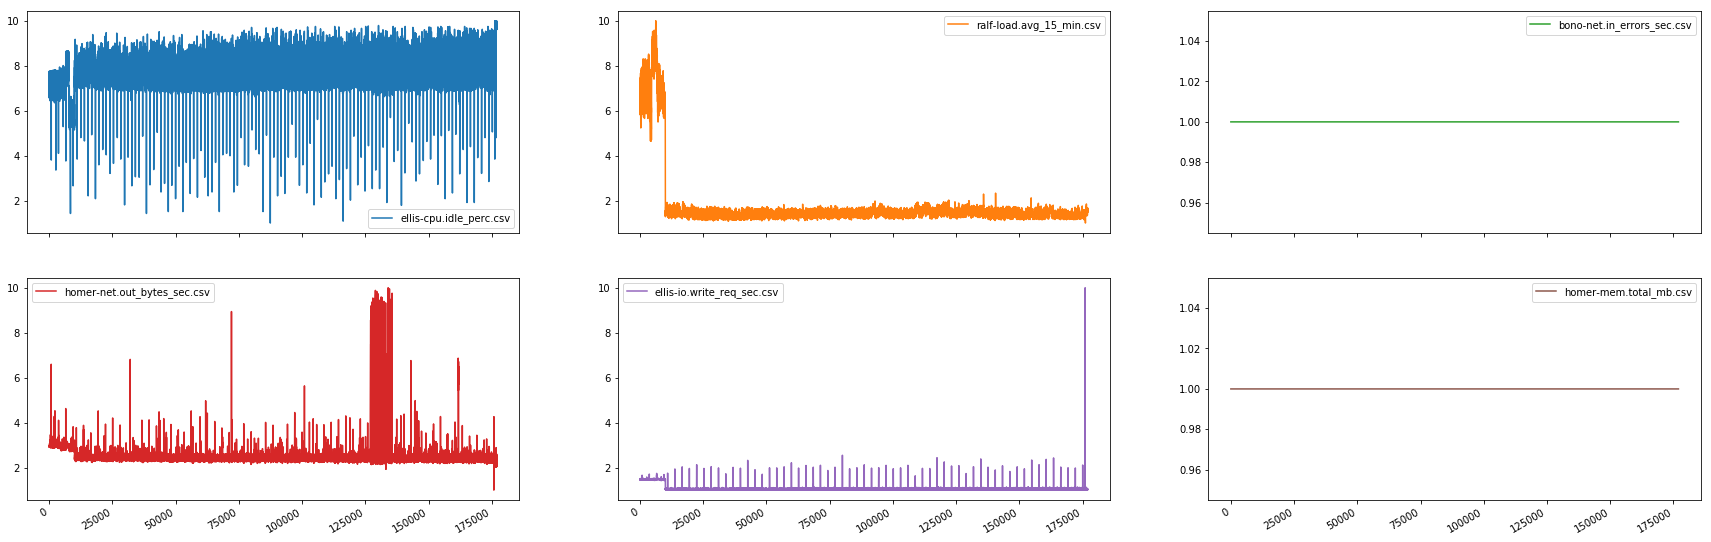

In [6]:
dframe.iloc[:,0:6].plot(subplots=True, layout=(2,3),figsize=(30,10))

## Data:

In [7]:
dframe.iloc[0:10,0:10].T

,0,1,2,3,4,5,6,7,8,9
ellis-cpu.idle_perc.csv,7.15566,7.72878,7.41038,7.17689,7.3467,7.75,7.55896,6.83726,6.75236,6.56132
ralf-load.avg_15_min.csv,6.02473,6.34276,6.50177,6.44876,6.50177,6.66078,6.81979,6.92579,7.13781,7.24382
bono-net.in_errors_sec.csv,1,1,1,1,1,1,1,1,1,1
homer-net.out_bytes_sec.csv,2.9567,2.94612,2.96211,2.9509,2.95498,2.95011,2.94821,2.93452,2.95551,2.92307
ellis-io.write_req_sec.csv,1.48758,1.50086,1.49064,1.48351,1.48351,1.49982,1.4978,1.45496,1.46821,1.48452
homer-mem.total_mb.csv,1,1,1,1,1,1,1,1,1,1
homestead-load.avg_1_min.csv,1.49388,1.36707,1.3871,1.27364,1.23359,1.14016,1.08676,1.16018,1.09344,1.13348
homer-load.avg_1_min.csv,5.05236,3.45026,2.79058,2.64921,2.69634,2.03665,1.89529,2.31937,1.80105,1.4712
sprout-cpu.stolen_perc.csv,1,1,1,1,1,1,1,1,1,1
ralf-cpu.idle_perc.csv,8.51734,8.58237,8.51734,8.63439,8.32226,8.38728,8.58237,8.30925,8.10116,8.12717


In [8]:
dframe.head()

,ellis-cpu.idle_perc.csv,ralf-load.avg_15_min.csv,bono-net.in_errors_sec.csv,homer-net.out_bytes_sec.csv,ellis-io.write_req_sec.csv,homer-mem.total_mb.csv,homestead-load.avg_1_min.csv,homer-load.avg_1_min.csv,sprout-cpu.stolen_perc.csv,ralf-cpu.idle_perc.csv,...,sprout-net.in_errors_sec.csv,ellis-disk.space_used_perc.csv,sprout-net.out_packets_sec.csv,sprout-net.in_packets_dropped_sec.csv,ralf-cpu.system_perc.csv,ralf-mem.free_mb.csv,bono-io.read_req_sec.csv,bono-net.in_packets_sec.csv,homestead-cpu.wait_perc.csv,ellis-load.avg_1_min.csv
0,7.15566,6.02473,1,2.9567,1.48758,1,1.49388,5.05236,1,8.51734,...,1,1.64286,1.44158,1,1.27411,7.51346,1,1.1727,4.20745,7.03488
1,7.72878,6.34276,1,2.94612,1.50086,1,1.36707,3.45026,1,8.58237,...,1,1.64286,1.42825,1,1.27411,7.50855,1,1.17308,3.05851,7.24419
2,7.41038,6.50177,1,2.96211,1.49064,1,1.3871,2.79058,1,8.51734,...,1,1.64286,1.4409,1,1.3198,7.51182,1,1.17337,2.7234,6.30233
3,7.17689,6.44876,1,2.9509,1.48351,1,1.27364,2.64921,1,8.63439,...,1,1.64286,1.42667,1,1.22843,7.50036,1,1.17027,2.7234,5.98837
4,7.3467,6.50177,1,2.95498,1.48351,1,1.23359,2.69634,1,8.32226,...,1,1.64286,1.44135,1,1.36548,7.502,1,1.1826,2.67553,6.02326


### Adding three different SLOs 
#### Response Time 
#### Availability
#### Throughput

After the test is generated by the stress VM, the vIMS/VNF was impacted in different ways i.e. different SLOs would be breached. We capture these hypothetical SLO breaches and defined them as a case study.
Instead of focusing on a subset of metrics, we used all the metrics as inputs.

In [9]:
def set_response_time(x):
    return 1
def set_availability(x):
    return 1
def set_throughput(x):
    return 1

dframe['response_time'] = dframe.apply(lambda x: set_response_time(x), axis = 1) 
dframe['availability'] = dframe.apply(lambda x: set_availability(x), axis = 1) 
dframe['transaction'] = dframe.apply(lambda x: set_throughput(x), axis = 1) 


dframe['response_time'][0:10000], dframe['response_time'][120000:140000] = (8,8)  
dframe['availability'][0:900],dframe['availability'][130000:150000] = (8,8) 
dframe['transaction'][0:10000],dframe['transaction'][130000:135000] = (8,8) 

/home/imen/data-science/TNSM-master/venv/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/home/imen/data-science/TNSM-master/venv/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/imen/data-science/TNSM-master/venv/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [10]:
dframe.head()

,ellis-cpu.idle_perc.csv,ralf-load.avg_15_min.csv,bono-net.in_errors_sec.csv,homer-net.out_bytes_sec.csv,ellis-io.write_req_sec.csv,homer-mem.total_mb.csv,homestead-load.avg_1_min.csv,homer-load.avg_1_min.csv,sprout-cpu.stolen_perc.csv,ralf-cpu.idle_perc.csv,...,sprout-net.in_packets_dropped_sec.csv,ralf-cpu.system_perc.csv,ralf-mem.free_mb.csv,bono-io.read_req_sec.csv,bono-net.in_packets_sec.csv,homestead-cpu.wait_perc.csv,ellis-load.avg_1_min.csv,response_time,availability,transaction
0,7.15566,6.02473,1,2.9567,1.48758,1,1.49388,5.05236,1,8.51734,...,1,1.27411,7.51346,1,1.1727,4.20745,7.03488,8,8,8
1,7.72878,6.34276,1,2.94612,1.50086,1,1.36707,3.45026,1,8.58237,...,1,1.27411,7.50855,1,1.17308,3.05851,7.24419,8,8,8
2,7.41038,6.50177,1,2.96211,1.49064,1,1.3871,2.79058,1,8.51734,...,1,1.3198,7.51182,1,1.17337,2.7234,6.30233,8,8,8
3,7.17689,6.44876,1,2.9509,1.48351,1,1.27364,2.64921,1,8.63439,...,1,1.22843,7.50036,1,1.17027,2.7234,5.98837,8,8,8
4,7.3467,6.50177,1,2.95498,1.48351,1,1.23359,2.69634,1,8.32226,...,1,1.36548,7.502,1,1.1826,2.67553,6.02326,8,8,8


### Create and store multiple figures

In [11]:
t1 = time.clock()
plt.style.use('ggplot')
for i in range(len(dframe.columns)):
    """ax = dframe.iloc[:,i].plot(figsize=(30,10))
    fig = ax.get_figure()
    """
    name = str(dframe.columns[i])
    names = name[:-4]
    fig = plt.figure(figsize=(30, 10))
    plt.plot(dframe.iloc[:,i], label=names)
    plt.savefig("Figures/Metrics/"+names+".png")
    plt.clf()
    fig.clf()
    fig.clear()
t2 = time.clock()

print (t2 - t1)

/home/imen/data-science/TNSM-master/venv/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


134.297904


<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

## SLO Analysis

## SLO 1 :  Transaction

### Sprout

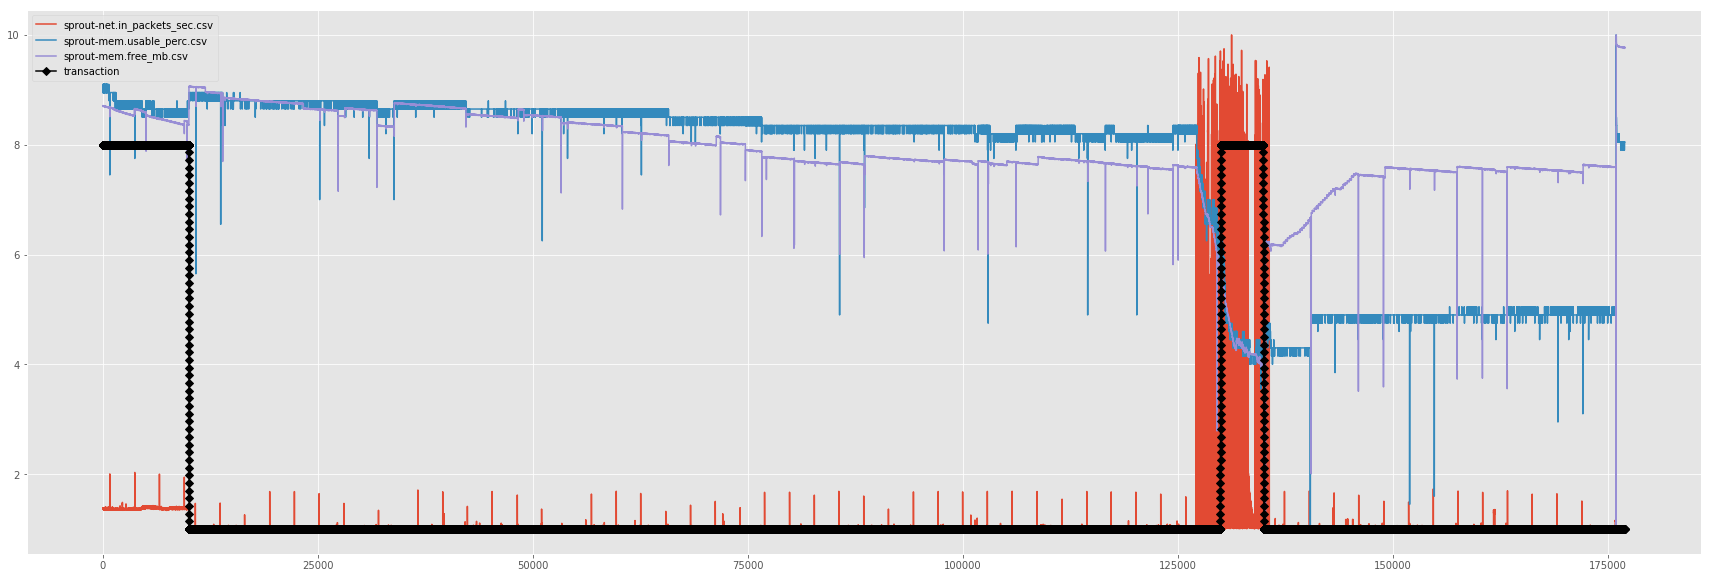

In [12]:
dframe['sprout-net.in_packets_sec.csv'].plot(figsize=(30,10), subplots=False,legend=True)
dframe['sprout-mem.usable_perc.csv'].plot(figsize=(30,10), subplots=False,legend=True)
dframe['sprout-mem.free_mb.csv'].plot(figsize=(30,10), subplots=False,legend=True)
dframe['transaction'].rolling(window=50,center=True).mean().plot(style='kD-',figsize=(30,10), subplots=False,legend=True)

### Sprout 2

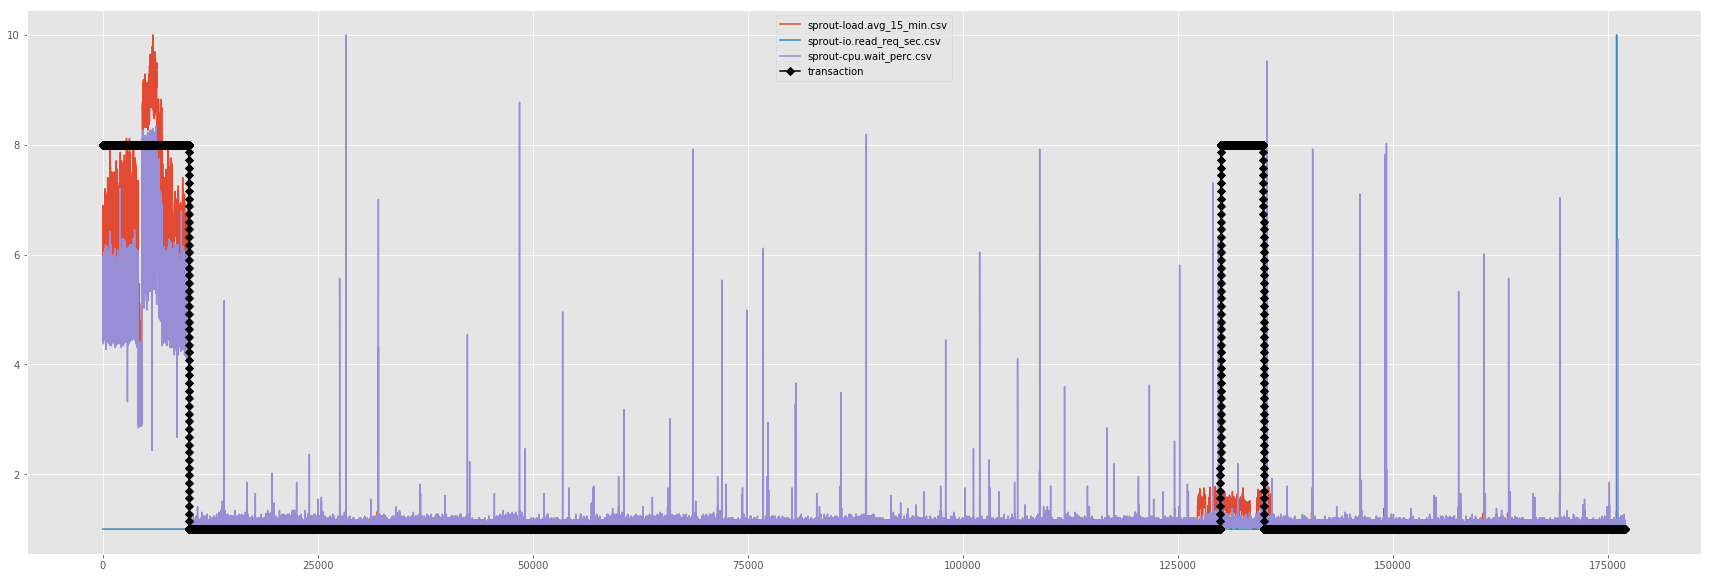

In [13]:
dframe['sprout-load.avg_15_min.csv'].plot(figsize=(30,10), subplots=False,legend=True)
dframe['sprout-io.read_req_sec.csv'].plot(figsize=(30,10), subplots=False,legend=True)
dframe['sprout-cpu.wait_perc.csv'].plot(figsize=(30,10), subplots=False,legend=True)
dframe['transaction'].rolling(window=50,center=True).mean().plot(style='kD-',figsize=(30,10), subplots=False,legend=True)

# SLO 2 : Availability

### Ralf

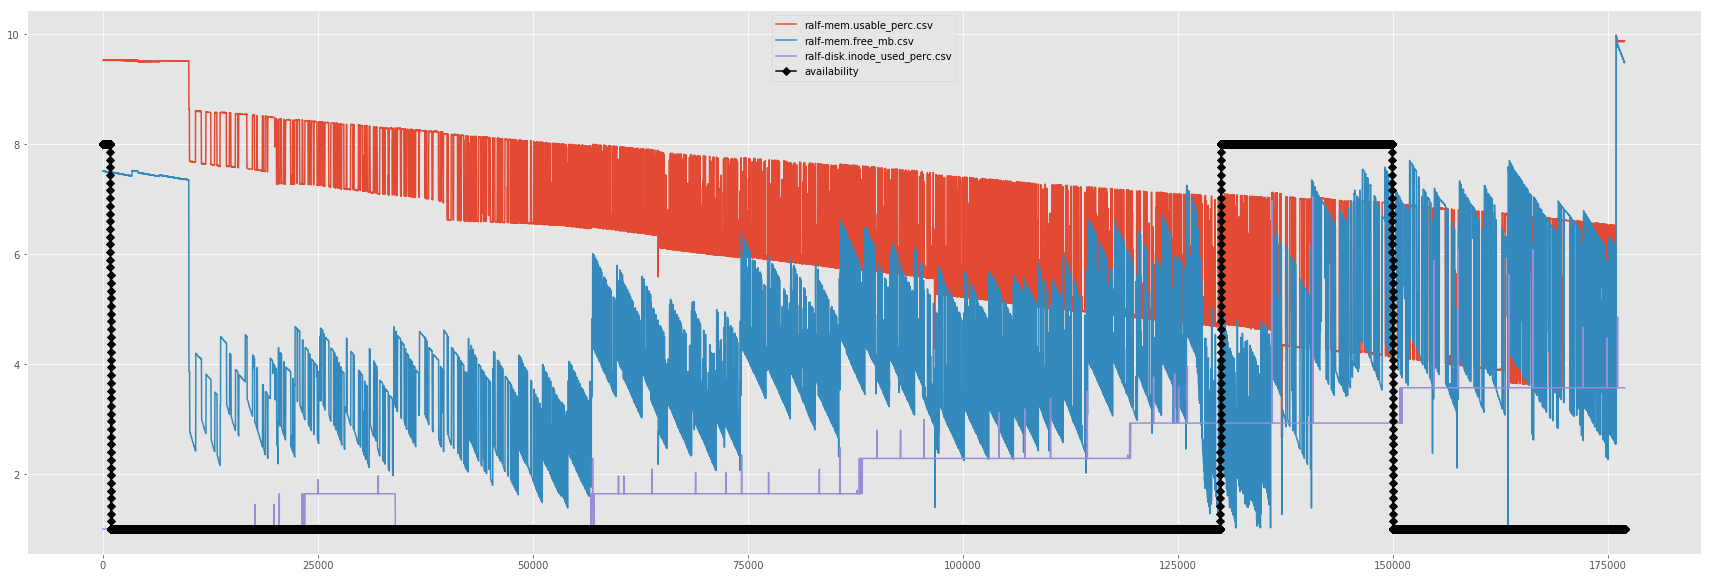

In [14]:
dframe['ralf-mem.usable_perc.csv'].rolling(window=10,center=False).mean().plot(figsize=(30,10), subplots=False,legend=True)
dframe['ralf-mem.free_mb.csv'].rolling(window=10,center=False).mean().plot(figsize=(30,10), subplots=False,legend=True)
dframe['ralf-disk.inode_used_perc.csv'].rolling(window=10,center=False).mean().plot(figsize=(30,10), subplots=False,legend=True)
dframe['availability'].rolling(window=50,center=True).mean().plot(style='kD-',figsize=(30,10), subplots=False,legend=True)

### Homestead

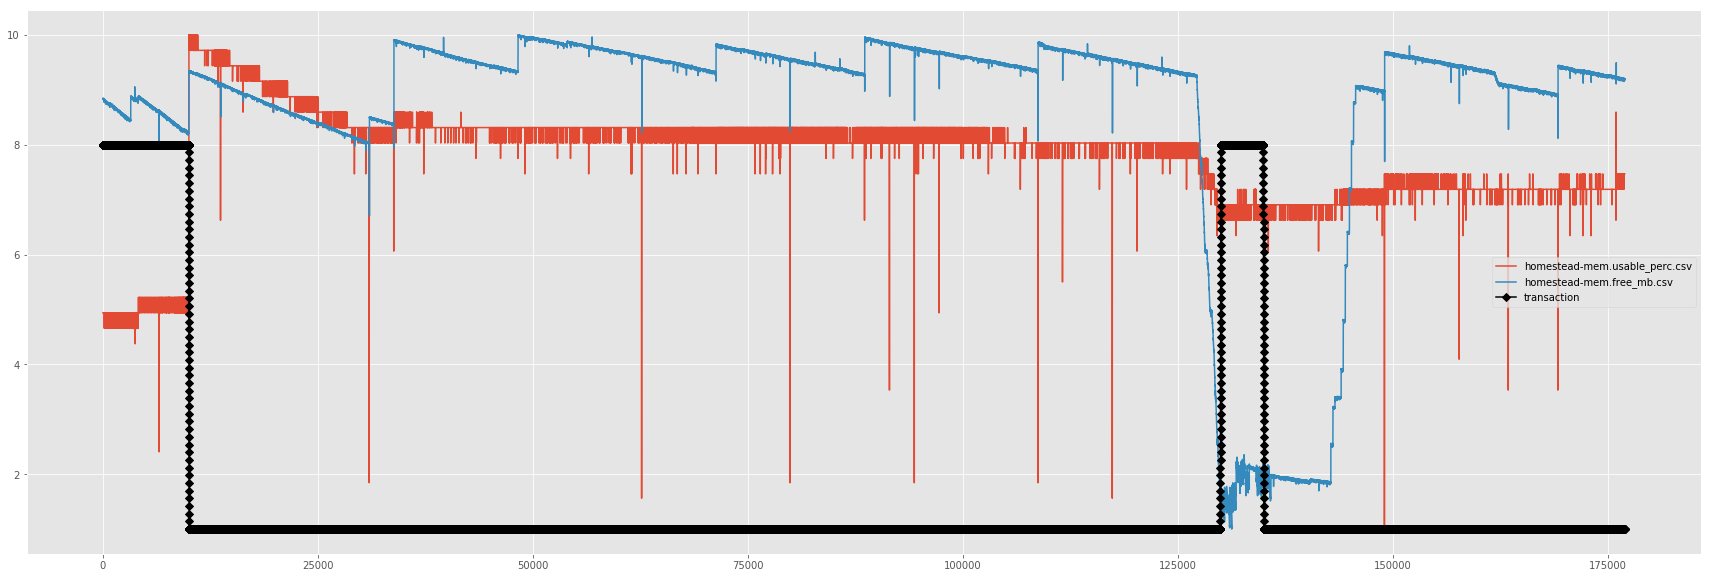

In [15]:
dframe['homestead-mem.usable_perc.csv'].plot(figsize=(30,10), subplots=False,legend=True)
dframe['homestead-mem.free_mb.csv'].plot(figsize=(30,10), subplots=False,legend=True)
dframe['transaction'].rolling(window=50,center=True).mean().plot(style='kD-',figsize=(30,10), subplots=False,legend=True)

### Homestead

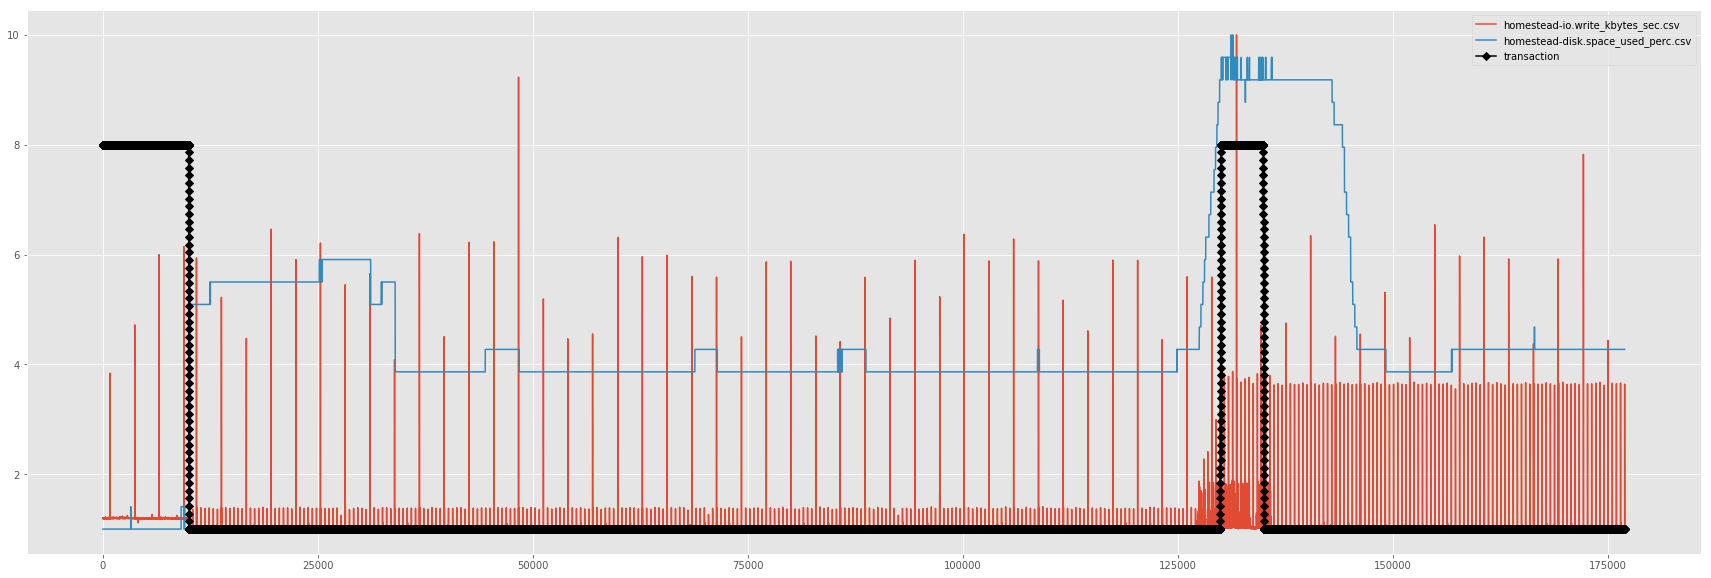

In [16]:
dframe['homestead-io.write_kbytes_sec.csv'].plot(figsize=(30,10), subplots=False,legend=True)
dframe['homestead-disk.space_used_perc.csv'].plot(figsize=(30,10), subplots=False,legend=True)
dframe['transaction'].rolling(window=50,center=True).mean().plot(style='kD-',figsize=(30,10), subplots=False,legend=True)

# SLO 3: Response Time

### Homer

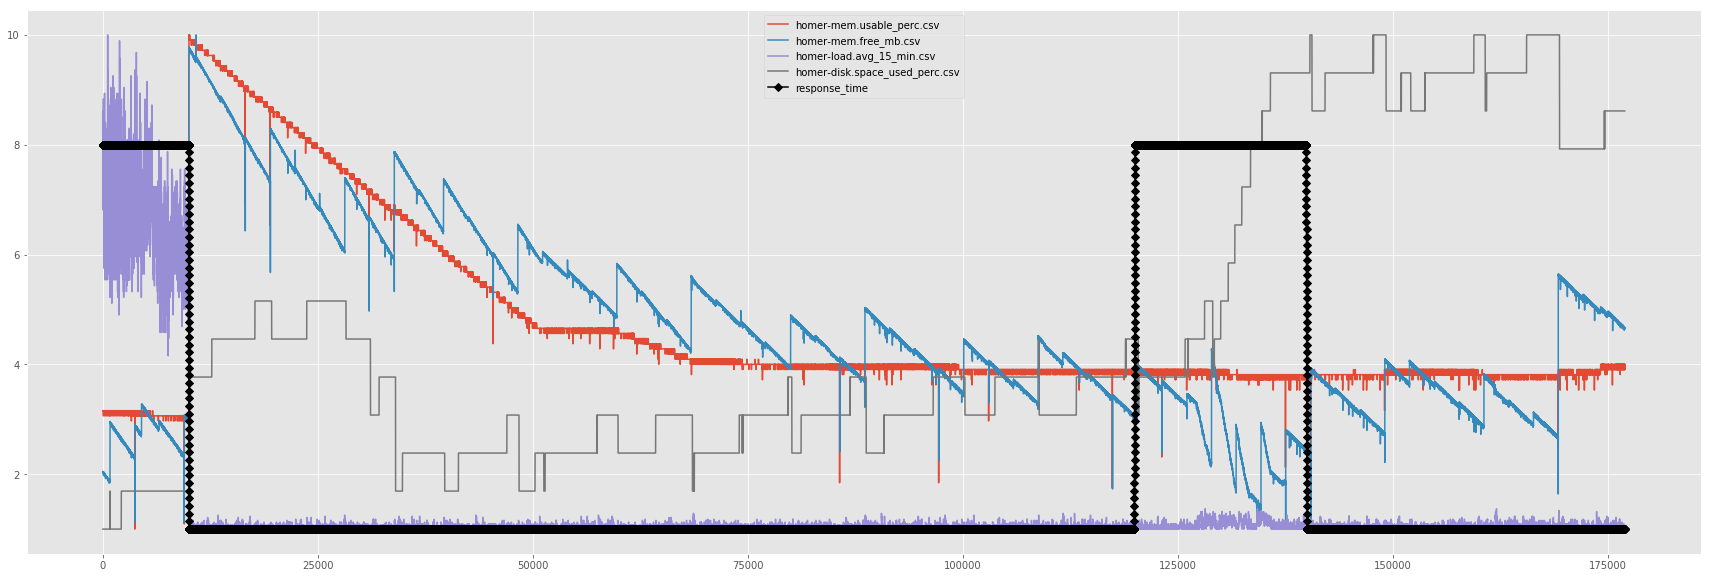

In [17]:
dframe['homer-mem.usable_perc.csv'].plot(figsize=(30,10), subplots=False,legend=True)
dframe['homer-mem.free_mb.csv'].plot(figsize=(30,10), subplots=False,legend=True)
dframe['homer-load.avg_15_min.csv'].plot(figsize=(30,10), subplots=False,legend=True)
dframe['homer-disk.space_used_perc.csv'].plot(figsize=(30,10), subplots=False,legend=True)
dframe['response_time'].rolling(window=50,center=True).mean().plot(style='kD-',figsize=(30,10), subplots=False,legend=True)

### Ellis

In [18]:
frame_10 = pd.rolling_mean(dframe['ellis-net.in_bytes_sec.csv'],10) # 10 steps = 10 * 30sec =  5 min

/home/imen/data-science/TNSM-master/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  """Entry point for launching an IPython kernel.


### Bono

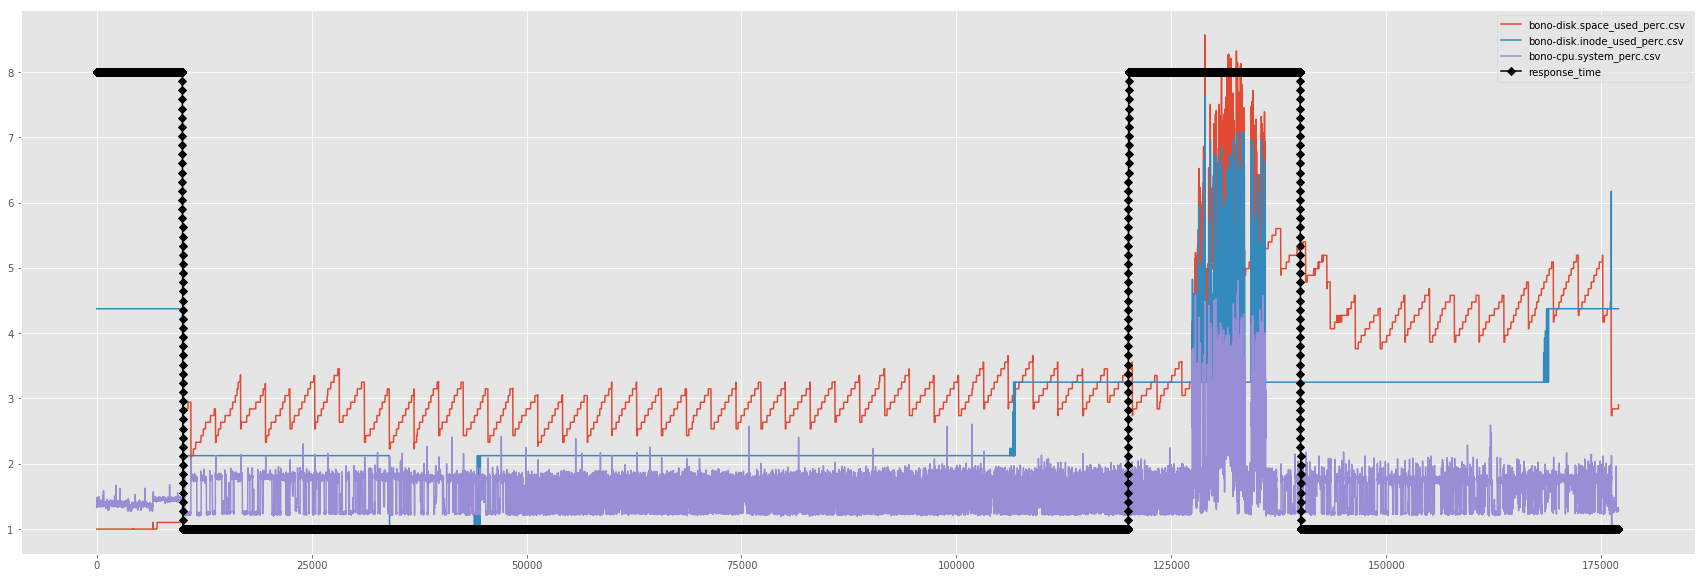

In [19]:
dframe['bono-disk.space_used_perc.csv'].rolling(window=10,center=False).mean().plot(figsize=(30,10), subplots=False,legend=True)
dframe['bono-disk.inode_used_perc.csv'].rolling(window=10,center=False).mean().plot(figsize=(30,10), subplots=False,legend=True)
dframe['bono-cpu.system_perc.csv'].rolling(window=10,center=False).mean().plot(figsize=(30,10), subplots=False,legend=True)
dframe['response_time'].rolling(window=50,center=True).mean().plot(style='kD-',figsize=(30,10), subplots=False,legend=True)

## Spliting the data

In [20]:
dframe_SLO_one = dframe.iloc[0:11500,:] # 11500
dframe_SLO_two = dframe.iloc[120000:140000,:] # 20.000
dframe_normal_one = dframe.iloc[11500:120000,:] # 108.500
dframe_normal_two = dframe.iloc[120000:,:] # 57000

In [21]:
dframe_SLO1 = dframe.iloc[0:10000,:] # 11500
dframe_SLO2 = dframe.iloc[120000:130000,:] # 20.000
dframe_normal1 = dframe.iloc[11500:21500,:] # 108.500
dframe_normal2 = dframe.iloc[120000:130000,:] # 57000

dframe_SLO1['bono-disk.space_used_perc.csv'].reset_index(drop=True,inplace=True)
dframe_SLO2['bono-disk.space_used_perc.csv'].reset_index(drop=True,inplace=True)
dframe_normal1['bono-disk.space_used_perc.csv'].reset_index(drop=True,inplace=True)
dframe_normal2['bono-disk.space_used_perc.csv'].reset_index(drop=True,inplace=True)

dframe_tuple = (dframe_SLO2['bono-disk.space_used_perc.csv'],dframe_normal1['bono-disk.space_used_perc.csv'])

## First thing: Rescaling

In [22]:
TS1 = dframe['bono-disk.space_used_perc.csv'][10000:20000]#.plot(figsize=(30,10), subplots=False,legend=True)
TS2 = dframe['bono-cpu.wait_perc.csv'][10000:20000]#.plot(figsize=(30,10), subplots=False,legend=True)
TS3 = dframe['bono-cpu.system_perc.csv'][10000:20000]#.plot(figsize=(30,10), subplots=False,legend=True)

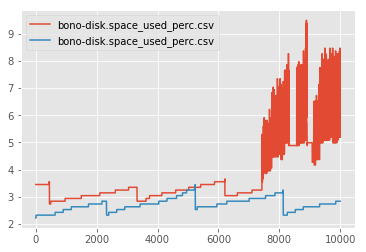

In [23]:
for df in dframe_tuple:
    df.plot(legend=True)

In [24]:
data = TS1.values
data = data.astype('float32') 

### Below the code to rescale a dataset using scikit-learn

In [25]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(data.reshape(-1,1))
dataset

array([[0.49999964],
       [0.49999964],
       [0.49999964],
       ...,
       [0.2857144 ],
       [0.2857144 ],
       [0.2857144 ]], dtype=float32)

## Rescalling all the dataframe

### Standard variation

In [26]:
X = pd.DataFrame(index=['std','mean'],data=[sequences_scaled.std(axis=0).values.T,sequences_scaled.mean(axis=0).values.T], columns = ['SLOV','Normal'])

NameError: name 'sequences_scaled' is not defined

In [27]:
X

array([[7.155660629272461, 6.024734973907471, 1.0, ...,
        1.1726961135864258, 4.207447052001953, 7.034883975982666],
       [7.7287750244140625, 6.3427557945251465, 1.0, ...,
        1.1730834245681763, 3.0585107803344727, 7.244185924530029],
       [7.410377502441406, 6.501766204833984, 1.0, ...,
        1.1733746528625488, 2.7234044075012207, 6.30232572555542],
       ...,
       [9.702829360961914, 1.5194345712661743, 1.0, ...,
        1.1714351177215576, 1.0957447290420532, 1.034883737564087],
       [9.936319351196289, 1.5035336017608643, 1.0, ...,
        1.1734737157821655, 1.0478723049163818, 1.024418592453003],
       [9.766510009765625, 1.5035336017608643, 1.0, ...,
        1.1670666933059692, 1.0957447290420532, 1.139534831047058]],
      dtype=object)

In [28]:
"""## SLO transaction
dframe_transaction_SLO = pd.DataFrame()
dframe_transaction_SLOV = pd.DataFrame()

## SLO response time
dframe_resp_SLO = pd.DataFrame()
dframe_resp_SLOV = pd.DataFrame()

## SLO availability
dframe_av_SLO = pd.DataFrame()
dframe_av_SLOV = pd.DataFrame()

### Splitting the data between SLO and SLO Violation

dframe_transaction_SLO = dframe[dframe.transaction == 1] 
dframe_transaction_SLOV = dframe[dframe.transaction == 8]


dframe_resp_SLO = dframe[dframe.response_time == 1] 
dframe_resp_SLOV = dframe[dframe.response_time == 8]


dframe_av_SLO = dframe[dframe.availability == 1] 
dframe_av_SLOV = dframe[dframe.availability == 8]"""

'## SLO transaction\ndframe_transaction_SLO = pd.DataFrame()\ndframe_transaction_SLOV = pd.DataFrame()\n\n## SLO response time\ndframe_resp_SLO = pd.DataFrame()\ndframe_resp_SLOV = pd.DataFrame()\n\n## SLO availability\ndframe_av_SLO = pd.DataFrame()\ndframe_av_SLOV = pd.DataFrame()\n\n### Splitting the data between SLO and SLO Violation\n\ndframe_transaction_SLO = dframe[dframe.transaction == 1] \ndframe_transaction_SLOV = dframe[dframe.transaction == 8]\n\n\ndframe_resp_SLO = dframe[dframe.response_time == 1] \ndframe_resp_SLOV = dframe[dframe.response_time == 8]\n\n\ndframe_av_SLO = dframe[dframe.availability == 1] \ndframe_av_SLOV = dframe[dframe.availability == 8]'

In [29]:
def set_response_time(x):
    return True if x.response_time == 8 else False
def set_availability(x):
    return True if x.availability == 8 else False
def set_throughput(x):
    return True if x.transaction == 8 else False

dframe['response_time'] = dframe.apply(lambda x: set_response_time(x), axis = 1) 
dframe['availability'] = dframe.apply(lambda x: set_availability(x), axis = 1) 
dframe['transaction'] = dframe.apply(lambda x: set_throughput(x), axis = 1) 


In [30]:
dframe.tail()

,ellis-cpu.idle_perc.csv,ralf-load.avg_15_min.csv,bono-net.in_errors_sec.csv,homer-net.out_bytes_sec.csv,ellis-io.write_req_sec.csv,homer-mem.total_mb.csv,homestead-load.avg_1_min.csv,homer-load.avg_1_min.csv,sprout-cpu.stolen_perc.csv,ralf-cpu.idle_perc.csv,...,sprout-net.in_packets_dropped_sec.csv,ralf-cpu.system_perc.csv,ralf-mem.free_mb.csv,bono-io.read_req_sec.csv,bono-net.in_packets_sec.csv,homestead-cpu.wait_perc.csv,ellis-load.avg_1_min.csv,response_time,availability,transaction
176995,9.74528,1.56184,1,2.04671,1.02041,1,1.00667,1.02356,1,9.21965,...,1,1.3198,9.48927,1,1.16775,1.09574,1.10465,False,False,False
176996,9.63915,1.54594,1,2.39905,1.05303,1,1.01468,1.01414,1,9.25867,...,1,1.3198,9.48927,1,1.17279,1.14362,1.06279,False,False,False
176997,9.70283,1.51943,1,2.31594,1.02754,1,1.04538,1.07068,1,9.27168,...,1,1.27411,9.48927,1,1.17144,1.09574,1.03488,False,False,False
176998,9.93632,1.50353,1,2.12895,1.04691,1,1.03671,1.04712,1,9.21965,...,1,1.27411,9.48763,1,1.17347,1.04787,1.02442,False,False,False
176999,9.76651,1.50353,1,2.05062,1.01937,1,1.03471,1.32042,1,9.24567,...,1,1.3198,9.48763,1,1.16707,1.09574,1.13953,False,False,False


In [76]:
"""
Warning: Run only once
"""
"""
del dframe_av_SLO['response_time']
del dframe_av_SLO['availability']
del dframe_av_SLO['transaction']

del dframe_resp_SLO['response_time']
del dframe_resp_SLO['availability']
del dframe_resp_SLO['transaction']


del dframe_transaction_SLO['response_time']
del dframe_transaction_SLO['availability']
del dframe_transaction_SLO['transaction']


del dframe_av_SLOV['response_time']
del dframe_av_SLOV['availability']
del dframe_av_SLOV['transaction']

del dframe_resp_SLOV['response_time']
del dframe_resp_SLOV['availability']
del dframe_resp_SLOV['transaction']


del dframe_transaction_SLOV['response_time']
del dframe_transaction_SLOV['availability']
del dframe_transaction_SLOV['transaction']"""

"\ndel dframe_av_SLO['response_time']\ndel dframe_av_SLO['availability']\ndel dframe_av_SLO['transaction']\n\ndel dframe_resp_SLO['response_time']\ndel dframe_resp_SLO['availability']\ndel dframe_resp_SLO['transaction']\n\n\ndel dframe_transaction_SLO['response_time']\ndel dframe_transaction_SLO['availability']\ndel dframe_transaction_SLO['transaction']\n\n\ndel dframe_av_SLOV['response_time']\ndel dframe_av_SLOV['availability']\ndel dframe_av_SLOV['transaction']\n\ndel dframe_resp_SLOV['response_time']\ndel dframe_resp_SLOV['availability']\ndel dframe_resp_SLOV['transaction']\n\n\ndel dframe_transaction_SLOV['response_time']\ndel dframe_transaction_SLOV['availability']\ndel dframe_transaction_SLOV['transaction']"

In [31]:
dframe_transaction_SLOV.head()

NameError: name 'dframe_transaction_SLOV' is not defined

In [78]:
def metric_name(name):
    for i,x in  enumerate(dframe.columns.values):
        if x == name:
            return i
        else:
            return None

In [79]:
dframe.columns.values[30]

'bono-mem.usable_perc.csv'

In [80]:
metric_name('ellis-cpu.idle_perc.csv')

0

In [81]:
## The distribution of both Normal and SLOV Data

name = metric_name('ellis-cpu.idle_perc.csv')

dframe_resp_SLO['ellis-cpu.idle_perc.csv'].hist(bins=40, range=(0, 10), alpha =0.3)
dframe_resp_SLOV['ellis-cpu.idle_perc.csv'].hist(bins=40, range=(0, 10), alpha =0.3)
plt.legend(['Normal', 'SLOV'])
plt.title('Response time SLO: The distribution of CPU of ELLIS')


NameError: name 'dframe_resp_SLO' is not defined

In [82]:
## The distribution of both Normal and SLOV Data

name = metric_name('ellis-cpu.idle_perc.csv')

dframe_transaction_SLO['ellis-cpu.idle_perc.csv'].hist(bins=40, range=(0, 10), alpha =0.3)
dframe_transaction_SLOV['ellis-cpu.idle_perc.csv'].hist(bins=40, range=(0, 10), alpha =0.3)
plt.legend(['Normal', 'SLOV'])
plt.title('Transaction SLO: The distribution of CPU of ELLIS')

NameError: name 'dframe_transaction_SLO' is not defined

In [83]:
## The distribution of both Normal and SLOV Data

name = metric_name('ellis-cpu.idle_perc.csv')

dframe_av_SLO['ellis-cpu.idle_perc.csv'].hist(bins=40, range=(0, 10), alpha =0.3)
dframe_av_SLOV['ellis-cpu.idle_perc.csv'].hist(bins=40, range=(0, 10), alpha =0.3)
plt.legend(['Normal', 'SLOV'])
plt.title('Availability SLO: The distribution of CPU of ELLIS')

NameError: name 'dframe_av_SLO' is not defined

In [84]:
## The distribution of both Normal and SLOV Data

dframe_resp_SLO["homestead-mem.free_mb.csv"].hist(bins=40, range=(0, 10), alpha =0.3)
dframe_resp_SLOV["homestead-mem.free_mb.csv"].hist(bins=40, range=(0, 10), alpha =0.3)
plt.legend(['Normal', 'SLOV'])
plt.title('Transaction SLO: The distribution of 20 of xxx')

NameError: name 'dframe_resp_SLO' is not defined

In [85]:
dframe_resp_SLO["sprout-disk.space_used_perc.csv"].hist(bins=40, range=(0, 10), alpha =0.3)
dframe_resp_SLOV["sprout-disk.space_used_perc.csv"].hist(bins=40, range=(0, 10), alpha =0.3)
plt.legend(['Normal', 'SLOV'])
plt.title('Transaction SLO: The distribution of 20 of xxx')



NameError: name 'dframe_resp_SLO' is not defined

In [86]:
dframe_resp_SLO["bono-mem.usable_perc.csv"].hist(bins=40, range=(0, 10), alpha =0.3)
dframe_resp_SLOV["bono-mem.usable_perc.csv"].hist(bins=40, range=(0, 10), alpha =0.3)
plt.legend(['Normal', 'SLOV'])
plt.title('Transaction SLO: The distribution of 20 of xxx')




NameError: name 'dframe_resp_SLO' is not defined

In [87]:
dframe_resp_SLO["ellis-io.write_req_sec.csv"].hist(bins=40, range=(0, 10), alpha =0.3)
dframe_resp_SLOV["ellis-io.write_req_sec.csv"].hist(bins=40, range=(0, 10), alpha =0.3)
plt.legend(['Normal', 'SLOV'])
plt.title('Transaction SLO: The distribution of 20 of xxx')

NameError: name 'dframe_resp_SLO' is not defined

## Feature Engineering 

### Adding Fourier transformation can help 
### Adding Lagged values 

### But this can help only for the pediction not necessarly for the classification

In [88]:
dframe.head()

,ellis-cpu.idle_perc.csv,ralf-load.avg_15_min.csv,bono-net.in_errors_sec.csv,homer-net.out_bytes_sec.csv,ellis-io.write_req_sec.csv,homer-mem.total_mb.csv,homestead-load.avg_1_min.csv,homer-load.avg_1_min.csv,sprout-cpu.stolen_perc.csv,ralf-cpu.idle_perc.csv,...,sprout-net.in_packets_dropped_sec.csv,ralf-cpu.system_perc.csv,ralf-mem.free_mb.csv,bono-io.read_req_sec.csv,bono-net.in_packets_sec.csv,homestead-cpu.wait_perc.csv,ellis-load.avg_1_min.csv,response_time,availability,transaction
0,7.15566,6.02473,1,2.9567,1.48758,1,1.49388,5.05236,1,8.51734,...,1,1.27411,7.51346,1,1.1727,4.20745,7.03488,True,True,True
1,7.72878,6.34276,1,2.94612,1.50086,1,1.36707,3.45026,1,8.58237,...,1,1.27411,7.50855,1,1.17308,3.05851,7.24419,True,True,True
2,7.41038,6.50177,1,2.96211,1.49064,1,1.3871,2.79058,1,8.51734,...,1,1.3198,7.51182,1,1.17337,2.7234,6.30233,True,True,True
3,7.17689,6.44876,1,2.9509,1.48351,1,1.27364,2.64921,1,8.63439,...,1,1.22843,7.50036,1,1.17027,2.7234,5.98837,True,True,True
4,7.3467,6.50177,1,2.95498,1.48351,1,1.23359,2.69634,1,8.32226,...,1,1.36548,7.502,1,1.1826,2.67553,6.02326,True,True,True


In [89]:
SLOV_data = sequences_scaled['SLOV'].values
SLOV_data = SLOV_data.astype("float32")

SLOV_label = sequences_scaled['label'].values
SLOV_label = SLOV_label.astype("float32")

NameError: name 'sequences_scaled' is not defined

## Collect the data from the dataframe into a matrix n*m

In [90]:
"""data_resp_SLO = (dframe_resp_SLO.values).astype("float32")
data_resp_SLOV = (dframe_resp_SLOV.values).astype("float32")

data_av_SLO = (dframe_av_SLO.values).astype("float32")
data_av_SLOV = (dframe_av_SLOV.values).astype("float32")

data_trans_SLO = (dframe_transaction_SLO.values).astype("float32")
data_trans_SLOV = (dframe_transaction_SLOV.values).astype("float32")
"""

dataset = (dframe.values).astype("float32")

## Spliting the data into Training set and test set (maybe add validation set)

In [91]:
dataset.shape

(177000, 159)

In [92]:
def create_dataset(X,r):
    return X[:int(X.shape[0]*r)], X[int(X.shape[0]*r):]

In [93]:
X, Y = create_dataset(dataset, 0.7)

In [94]:
print dataset.shape
print X.shape
print Y.shape

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(dataset.shape)? (<ipython-input-94-2c2426ba552b>, line 1)

In [95]:
"""data_resp_SLO_train, data_resp_SLO_test = create_dataset(data_resp_SLO, ratio)
data_resp_SLOV_train, data_resp_SLOV_test = create_dataset(data_resp_SLOV, ratio) 

data_av_SLO_train, data_av_SLO_test = create_dataset(data_av_SLO, ratio)
data_av_SLOV_train, data_av_SLOV_test = create_dataset(data_av_SLOV, ratio)

data_trans_SLO_train, data_trans_SLO_test = create_dataset(data_trans_SLO, ratio)
data_trans_SLOV_train, data_trans_SLOV_test = create_dataset(data_trans_SLOV, ratio)
"""

# Split the data into Train set and testset 
# ration between 0 and 1

ratio = 0.7 # Ratio is 70% 

X_Train, X_Test = create_dataset(dataset,ratio)

slo1,slo2,slo3 = (156,157,158)

X_Train_slo1, Y_Test_slo1 = create_dataset(dataset[:,slo1],ratio)
X_Train_slo2, Y_Test_slo2 = create_dataset(dataset[:,slo2],ratio)
X_Train_slo3, Y_Test_slo3 = create_dataset(dataset[:,slo3],ratio)





In [96]:
"""
Inputs : (dataset,X_Train,X_Test,X_Train_slo1, Y_Test_slo1,X_Train_slo2, Y_Test_slo2,X_Train_slo3, Y_Test_slo3)
"""

'\nInputs : (dataset,X_Train,X_Test,X_Train_slo1, Y_Test_slo1,X_Train_slo2, Y_Test_slo2,X_Train_slo3, Y_Test_slo3)\n'

In [97]:
X_Train.shape

(123899, 159)

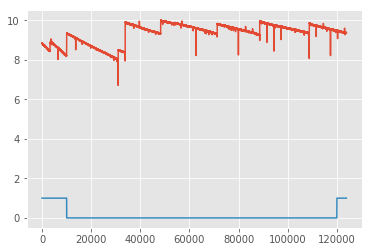

In [98]:
plt.plot(X_Train[:,20])
plt.plot(X_Train_slo1)

# LSTM with Keras/TensorFlow

##  Sequence classification with LSTM

## Fully connected predictor (Without LSTM cells)

In [99]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [100]:
K.clear_session()

model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                24        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [101]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

In [102]:
# inputs

X = X_Train[:,20]

y = X_Train_slo1

In [103]:
model.fit( X, y ,nb_epoch=2,  batch_size=20, verbose=1, callbacks=[early_stop])

/home/imen/data-science/TNSM-master/venv/lib/python3.6/site-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/2
123899/123899 [==============================] - 4s 31us/step - loss: 0.0953
Epoch 2/2
123899/123899 [==============================] - 4s 29us/step - loss: 0.0888


In [104]:
import math

# Estimate model performance
trainScore = model.evaluate(X, y, verbose=1)
trainScore = math.sqrt(trainScore)
#trainScore = scaler.inverse_transform(numpy.array([[trainScore]]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = model.evaluate(X_Test[:,20], Y_Test_slo1, verbose=1)
testScore = math.sqrt(testScore)
#testScore = scaler.inverse_transform(numpy.array([[testScore]]))
print('Test Score: %.2f RMSE' % (testScore))



123899/123899 [==============================] - 1s 10us/step
Train Score: 0.29 RMSE
53101/53101 [==============================] - 1s 10us/step
Test Score: 0.54 RMSE


In [105]:
y_pred = model.predict(Normal_test)

NameError: name 'Normal_test' is not defined

In [106]:
inputs = data_resp_SLO_train[:,22]
y_pred = model.predict(inputs)
plt.plot(inputs)
plt.plot(y_pred)

NameError: name 'data_resp_SLO_train' is not defined

## Recurrent predictor (With LSTM cells) 

In [107]:
from keras.layers import LSTM

In [108]:
"""
Inputs : (dataset,X_Train,X_Test,X_Train_slo1, Y_Test_slo1,X_Train_slo2, Y_Test_slo2,X_Train_slo3, Y_Test_slo3)
"""

'\nInputs : (dataset,X_Train,X_Test,X_Train_slo1, Y_Test_slo1,X_Train_slo2, Y_Test_slo2,X_Train_slo3, Y_Test_slo3)\n'

In [109]:
print X_Train.shape
print X_Test.shape 
print X_Train_slo1.shape 
print Y_Test_slo1.shape
print X_Train_slo2.shape
print Y_Test_slo2.shape
print X_Train_slo3.shape
print Y_Test_slo3.shape

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(X_Train.shape)? (<ipython-input-109-214f24cac706>, line 1)

In [110]:
"""
Convert from matrix to tensor
"""
# Keras needs shape (batch_size, timesteps, input_dim)
# X_train to tensor
X_Train = X_Train[:,:-3]
X_Train_t = X_Train[:, None]
X_Train_slo1_t = X_Train_slo1[:,None]

In [111]:
X_Train_slo1_t = X_Train_slo1.reshape(-1,1)
X_Train_slo1_t.shape

(123899, 1)

In [112]:
# (123899, 1, 159) == (Number of entries, Timestamp, Number of features)
X_Train_t.shape

(123899, 1, 156)

In [113]:
global LSTM_layer
global input_dim # This is equal to the number of features
global loss
global optimizer

LSTM_layer = 100 
input_dim = 1 # This is equal to the number of features
loss = ['mean_squared_error','binary_crossentropy']
optimizer = ['adam','other']


In [114]:
# Inintializing the LSTM model

K.clear_session()

model = Sequential()



model.add(LSTM(LSTM_layer, input_shape=(1, 156)))# 1 step, 1 number #input_dim=input_dim ))#input_shape=(1, 1)))


# The last layer shouldn't have an activation function is the problem is a regression. So you want the last node to output any value!
# 
#model.add(Dense(1))

# For classification problems you should add an activation function
model.add(Dense(1,activation='relu')) # softmax, sigmoid


# ALso for classification use:  loss = binary_crossentropy

# For regression use: mean_squared_error

model.compile(loss='binary_crossentropy', optimizer=optimizer[0]) #  metrics=['accuracy']

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               102800    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 102,901
Trainable params: 102,901
Non-trainable params: 0
_________________________________________________________________


## Brief desciprtion of the inputs: 

As discussed before the inputs have the following shape = (N, TS, F), where N is the number of entries, TS the number of timesteps processed at a time and F, the number of features.

The LSTM entry is a Tensor, which is basically a vectorized form of 3rd order of a 2D matrix. a Tensor is a mathematical representation of the entries. 

In [115]:
i = 3
nb_epoch = 3

X = X_Train_t
y = X_Train_slo1_t

model.fit(X, y, 
          nb_epoch=nb_epoch, batch_size=i, verbose=1,
          callbacks=[early_stop])

Epoch 1/3
123899/123899 [==============================] - 93s 748us/step - loss: 1.8081
Epoch 2/3
123899/123899 [==============================] - 96s 774us/step - loss: 1.8081
Epoch 3/3
123899/123899 [==============================] - 96s 775us/step - loss: 1.8081
Epoch 00003: early stopping


In [116]:
model.predict_classes(X)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

123899/123899 [==============================] - 51s 409us/step


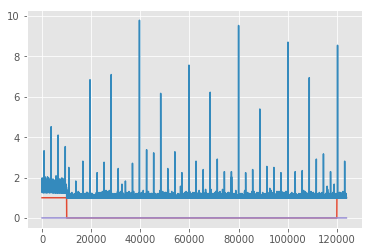

In [117]:

# y_pred = model.predict(trainX)
# The Error was here !! I should have added predict classes instead !
y_pred_classification = model.predict_classes(X, batch_size=1, verbose=1)
plt.plot(y)
plt.plot(X_Train[:,21])
plt.plot(y_pred_classification)

In [118]:
model.evaluate(X, y, batch_size=32, verbose=1, sample_weight=None)

123899/123899 [==============================] - 2s 20us/step


1.8081293548332102

## Unsupervised Learning 

In [119]:
def set_slov(x):
    return True if x.response_time == 8 or x.availability == 8 or x.transaction == 8  else False

# Collect all the SLOs in one dataframe

dframe_all_slov_t = pd.concat([dframe[dframe.response_time == True],dframe[dframe.availability == True], dframe[dframe.transaction == True]], axis=0)
dframe_all_slov = dframe_all_slov_t.iloc[:,0:156]

In [120]:
dframe_all_slov_t.head()

,ellis-cpu.idle_perc.csv,ralf-load.avg_15_min.csv,bono-net.in_errors_sec.csv,homer-net.out_bytes_sec.csv,ellis-io.write_req_sec.csv,homer-mem.total_mb.csv,homestead-load.avg_1_min.csv,homer-load.avg_1_min.csv,sprout-cpu.stolen_perc.csv,ralf-cpu.idle_perc.csv,...,sprout-net.in_packets_dropped_sec.csv,ralf-cpu.system_perc.csv,ralf-mem.free_mb.csv,bono-io.read_req_sec.csv,bono-net.in_packets_sec.csv,homestead-cpu.wait_perc.csv,ellis-load.avg_1_min.csv,response_time,availability,transaction
0,7.15566,6.02473,1,2.9567,1.48758,1,1.49388,5.05236,1,8.51734,...,1,1.27411,7.51346,1,1.1727,4.20745,7.03488,True,True,True
1,7.72878,6.34276,1,2.94612,1.50086,1,1.36707,3.45026,1,8.58237,...,1,1.27411,7.50855,1,1.17308,3.05851,7.24419,True,True,True
2,7.41038,6.50177,1,2.96211,1.49064,1,1.3871,2.79058,1,8.51734,...,1,1.3198,7.51182,1,1.17337,2.7234,6.30233,True,True,True
3,7.17689,6.44876,1,2.9509,1.48351,1,1.27364,2.64921,1,8.63439,...,1,1.22843,7.50036,1,1.17027,2.7234,5.98837,True,True,True
4,7.3467,6.50177,1,2.95498,1.48351,1,1.23359,2.69634,1,8.32226,...,1,1.36548,7.502,1,1.1826,2.67553,6.02326,True,True,True


In [121]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)

In [122]:
X = (dframe_all_slov.values).astype('float32')

In [123]:
X_reduced_3 = PCA(n_components=3).fit_transform(X)

In [124]:
X_reduced_2  = PCA(n_components=2).fit_transform(X)

In [126]:
print(pca.explained_variance_ratio_)

AttributeError: 'PCA' object has no attribute 'explained_variance_ratio_'

In [127]:
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [128]:
Y = (dframe_all_slov_t.iloc[:,-3:].values).astype('int')
Y.shape
Y = Y.sum(axis=1)
Y.shape

(65900,)

In [129]:
Y = Y -1

In [130]:
X_reduced_2.shape

(65900, 2)

In [131]:
set(Y)

{0, 1, 2}

/home/imen/data-science/TNSM-master/venv/lib/python3.6/site-packages/matplotlib/legend.py:938: UserWarning: Legend does not support 1 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/home/imen/data-science/TNSM-master/venv/lib/python3.6/site-packages/matplotlib/legend.py:938: UserWarning: Legend does not support 2 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/home/imen/data-science/TNSM-master/venv/lib/python3.6/site-packages/matplotlib/legend.py:938: UserWarning: Legend does not support 3 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
 

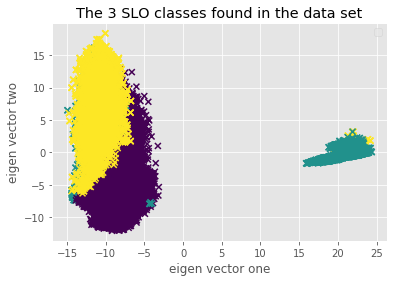

In [132]:
import matplotlib.patches as mpatches


# Plot the training points
plt.scatter(X_reduced_2[:, 0], X_reduced_2[:, 1], c=Y, marker='x')


#plt.scatter(range(0,X_reduced_3.shape[0]),X_reduced_3[:, 0], marker='o', color='b')
#plt.scatter(range(0,X_reduced_3.shape[0]),X_reduced_3[:, 1], marker='x', color='g')
#plt.scatter(range(0,X_reduced_3.shape[0]),X_reduced_3[:, 2], marker='o', color='r')
plt.xlabel('eigen vector one')
plt.ylabel('eigen vector two')


x_min = np.min(X_reduced_2[:, 0])
x_max = np.max(X_reduced_2[:, 0])

y_min = np.min(X_reduced_2[:, 1])
y_max = np.max(X_reduced_2[:, 1])

plt.legend((1, 2, 3), ('label1', 'label2', 'label3'))




plt.title('The 3 SLO classes found in the data set')

plt.legend(loc='upper right')



#plt.xlim(x_min, x_max)
#plt.ylim(y_min, y_max)
#plt.xticks(())
#plt.yticks(())

In [133]:

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_reduced_3[:, 0], X_reduced_3[:, 1], X_reduced_3[:, 2],c=Y,
           cmap=plt.cm.Paired)
ax.set_title("First three PCA directions of the 3 SLO classes found in the data set")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

NameError: name 'Axes3D' is not defined

<Figure size 576x432 with 0 Axes>

In [134]:
from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA


def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 5, max_x + 5)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)


def plot_subfigure(X, Y, subplot, title, transform):
    
    X = X_reduced_2
 

    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])

    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])

    classif = OneVsRestClassifier(SVC(kernel='linear'))
    classif.fit(X, Y)

    plt.subplot(2, 2, subplot)
    plt.title(title)

    zero_class = np.where(Y[:, 0])
    one_class = np.where(Y[:, 1])
    plt.scatter(X[:, 0], X[:, 1], s=40, c='gray')
    plt.scatter(X[zero_class, 0], X[zero_class, 1], s=160, edgecolors='b',
               facecolors='none', linewidths=2, label='Class 1')
    plt.scatter(X[one_class, 0], X[one_class, 1], s=80, edgecolors='orange',
               facecolors='none', linewidths=2, label='Class 2')

    plot_hyperplane(classif.estimators_[0], min_x, max_x, 'k--',
                    'Boundary\nfor class 1')
    plot_hyperplane(classif.estimators_[1], min_x, max_x, 'k-.',
                    'Boundary\nfor class 2')
    plt.xticks(())
    plt.yticks(())

    plt.xlim(min_x - .5 * max_x, max_x + .5 * max_x)
    plt.ylim(min_y - .5 * max_y, max_y + .5 * max_y)
    
    if subplot == 2:
        plt.xlabel('First principal component')
        plt.ylabel('Second principal component')
        plt.legend(loc="upper left")


plt.figure(figsize=(8, 6))

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [135]:
from sklearn.datasets import make_multilabel_classification

X, Y = make_multilabel_classification(n_classes=3, n_labels=3,
                                      allow_unlabeled=False,
                                      random_state=1)


X, Y = make_multilabel_classification(n_classes=3, n_labels=3,
                                      allow_unlabeled=True,
                                      random_state=1)

plot_subfigure(X, Y, 1, "With unlabeled samples + CCA", "cca")
plot_subfigure(X, Y, 2, "With unlabeled samples + PCA", "pca")

X, Y = make_multilabel_classification(n_classes=3, n_labels=3,
                                      allow_unlabeled=False,
                                      random_state=1)

plot_subfigure(X, Y, 3, "Without unlabeled samples + CCA", "cca")
plot_subfigure(X, Y, 4, "Without unlabeled samples + PCA", "pca")

plt.subplots_adjust(.04, .02, .97, .94, .09, .2)
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [65900, 100]

## Architecturing the data set: The input, output, training set, test set and validation set

Explain how the data set is organized, because you forget eveytime.

All the data set is stored in a Pandas dataframe called 'dframe'. The dframe contains the data from the normal state as well as the data from the SLO violation. In the dframe we have added three dummy boolean variables each of which reports the state of the SLO. 'True' means the SLO is violated false otherwise.

We have defined three SLOs, i.e. Response Time, Availability and Transaction. These maps to the following dummy variables: 'response_time', 'availability', 'transaction'.


We then create a 3 dframe subsets, 


The function 'get_data_ready' below does all the necessary steps to grabe the data, shuffle it and returns a tuple with The training set, test set and validation set. 

In [136]:
def set_response_time(x):
    return 1
def set_availability(x):
    return 1
def set_throughput(x):
    return 1

def metric_name(name):
    for i,x in  enumerate(dframe.columns.values):
        if x == name:
            return i
        else:
            return None
        
        
        
        
        
        
def create_dataset(X,r):
    return X[:int(X.shape[0]*r)], X[int(X.shape[0]*r):]

In [137]:
# help(train_test_split)

In [138]:
import sklearn 

# Warning Only works with scikit version 0.18 

# print sklearn.__version__

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(dataset[:,0:156], dataset[:,156:159], test_size=0.3, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [139]:
import numpy as np
import pandas as pd
# Warning Only works with scikit version 0.18 
# print sklearn.__version__
from sklearn.model_selection import train_test_split


def set_response_time(x):
    return 1
def set_availability(x):
    return 1
def set_throughput(x):
    return 1

def metric_name(name):
    for i,x in  enumerate(dframe.columns.values):
        if x == name:
            return i
        else:
            return None
        

def get_data_ready():
    """
    All the data set is stored in a Pandas dataframe called 'dframe'. The dframe contains the data from the normal state as well as the data from the SLO violation. In the dframe we have added three dummy boolean variables each of which reports the state of the SLO. 'True' means the SLO is violated false otherwise.

    We have defined three SLOs, i.e. Response Time, Availability and Transaction. These maps to the following dummy variables: 'response_time', 'availability', 'transaction'.


    We then create a 3 dframe subsets, 


    The function 'get_data_ready' below does all the necessary steps to grabe the data, shuffle it and returns a tuple with The training set, test set and validation set. 
    
    
    Version 1.00 
    
    __author__ = Jaafar
    
    """
    # Read the data locally 
    X = np.load("data/Tmp/X.npy")
    # Convert the data from matrix to a Huge Dataframe
    dframe = pd.DataFrame(data=X,columns=['ellis-cpu.idle_perc.csv', 'ralf-load.avg_15_min.csv', 'bono-net.in_errors_sec.csv', 'homer-net.out_bytes_sec.csv', 'ellis-io.write_req_sec.csv', 'homer-mem.total_mb.csv', 'homestead-load.avg_1_min.csv', 'homer-load.avg_1_min.csv', 'sprout-cpu.stolen_perc.csv', 'ralf-cpu.idle_perc.csv', 'sprout-io.read_req_sec.csv', 'homestead-net.in_bytes_sec.csv', 'homer-disk.space_used_perc.csv', 'bono-net.out_packets_sec.csv', 'homer-cpu.wait_perc.csv', 'ellis-net.in_packets_sec.csv', 'bono-mem.free_mb.csv', 'ellis-io.read_req_sec.csv', 'bono-mem.usable_mb.csv', 'bono-net.in_packets_dropped_sec.csv', 'homestead-mem.free_mb.csv', 'homer-io.write_time_sec.csv', 'sprout-io.write_time_sec.csv', 'homestead-net.in_errors_sec.csv', 'homestead-mem.usable_perc.csv', 'homestead-net.in_packets_dropped_sec.csv', 'homestead-io.write_req_sec.csv', 'bono-net.in_bytes_sec.csv', 'homestead-disk.space_used_perc.csv', 'homer-net.out_packets_sec.csv', 'bono-mem.usable_perc.csv', 'ralf-net.out_errors_sec.csv', 'homestead-load.avg_5_min.csv', 'sprout-io.read_kbytes_sec.csv', 'sprout-net.out_errors_sec.csv', 'homestead-io.write_kbytes_sec.csv', 'homestead-net.in_packets_sec.csv', 'sprout-mem.usable_mb.csv', 'homestead-cpu.idle_perc.csv', 'ralf-io.write_time_sec.csv', 'ralf-io.write_kbytes_sec.csv', 'ralf-io.write_req_sec.csv', 'ellis-net.out_bytes_sec.csv', 'bono-io.read_kbytes_sec.csv', 'bono-disk.space_used_perc.csv', 'homer-net.in_packets_dropped_sec.csv', 'ralf-mem.usable_mb.csv', 'bono-load.avg_15_min.csv', 'bono-io.read_time_sec.csv', 'sprout-mem.usable_perc.csv', 'bono-cpu.idle_perc.csv', 'homer-mem.usable_perc.csv', 'homestead-cpu.stolen_perc.csv', 'ralf-io.read_req_sec.csv', 'homer-cpu.idle_perc.csv', 'homestead-mem.total_mb.csv', 'ralf-load.avg_1_min.csv', 'homer-io.read_kbytes_sec.csv', 'homestead-io.read_req_sec.csv', 'ellis-mem.free_mb.csv', 'bono-io.write_time_sec.csv', 'ellis-net.out_errors_sec.csv', 'ellis-cpu.stolen_perc.csv', 'ellis-mem.usable_perc.csv', 'ralf-disk.inode_used_perc.csv', 'sprout-load.avg_15_min.csv', 'ellis-io.read_time_sec.csv', 'ralf-net.out_packets_sec.csv', 'sprout-io.write_req_sec.csv', 'bono-cpu.stolen_perc.csv', 'homestead-load.avg_15_min.csv', 'bono-cpu.system_perc.csv', 'homestead-net.out_packets_sec.csv', 'ellis-io.write_kbytes_sec.csv', 'sprout-cpu.idle_perc.csv', 'ellis-mem.total_mb.csv', 'homer-mem.usable_mb.csv', 'bono-load.avg_5_min.csv', 'ellis-load.avg_5_min.csv', 'homer-cpu.stolen_perc.csv', 'sprout-net.out_bytes_sec.csv', 'homestead-mem.usable_mb.csv', 'homestead-disk.inode_used_perc.csv', 'ralf-net.in_packets_dropped_sec.csv', 'sprout-io.write_kbytes_sec.csv', 'ellis-load.avg_15_min.csv', 'homer-load.avg_5_min.csv', 'ralf-mem.usable_perc.csv', 'bono-net.out_bytes_sec.csv', 'ellis-cpu.system_perc.csv', 'homer-io.read_time_sec.csv', 'ellis-disk.inode_used_perc.csv', 'homestead-io.read_time_sec.csv', 'sprout-net.in_bytes_sec.csv', 'bono-io.write_kbytes_sec.csv', 'homestead-io.read_kbytes_sec.csv', 'ellis-net.in_errors_sec.csv', 'sprout-io.read_time_sec.csv', 'homer-disk.inode_used_perc.csv', 'ralf-cpu.wait_perc.csv', 'homer-load.avg_15_min.csv', 'sprout-load.avg_5_min.csv', 'homer-io.read_req_sec.csv', 'ralf-mem.total_mb.csv', 'homer-mem.free_mb.csv', 'homer-net.in_packets_sec.csv', 'homestead-net.out_bytes_sec.csv', 'sprout-disk.inode_used_perc.csv', 'ellis-mem.usable_mb.csv', 'homer-io.write_kbytes_sec.csv', 'homer-net.out_errors_sec.csv', 'homer-cpu.system_perc.csv', 'ellis-io.read_kbytes_sec.csv', 'sprout-load.avg_1_min.csv', 'sprout-cpu.system_perc.csv', 'ralf-cpu.stolen_perc.csv', 'bono-mem.total_mb.csv', 'bono-net.out_errors_sec.csv', 'ellis-io.write_time_sec.csv', 'ralf-io.read_time_sec.csv', 'sprout-cpu.wait_perc.csv', 'ellis-cpu.wait_perc.csv', 'ralf-disk.space_used_perc.csv', 'ralf-net.out_bytes_sec.csv', 'ellis-net.in_packets_dropped_sec.csv', 'homer-net.in_bytes_sec.csv', 'ellis-net.in_bytes_sec.csv', 'bono-cpu.wait_perc.csv', 'ralf-net.in_packets_sec.csv', 'sprout-mem.total_mb.csv', 'ralf-net.in_bytes_sec.csv', 'bono-load.avg_1_min.csv', 'sprout-net.in_packets_sec.csv', 'bono-io.write_req_sec.csv', 'ralf-load.avg_5_min.csv', 'ralf-net.in_errors_sec.csv', 'bono-disk.inode_used_perc.csv', 'homestead-io.write_time_sec.csv', 'ellis-net.out_packets_sec.csv', 'sprout-disk.space_used_perc.csv', 'ralf-io.read_kbytes_sec.csv', 'homestead-cpu.system_perc.csv', 'sprout-mem.free_mb.csv', 'homer-net.in_errors_sec.csv', 'homestead-net.out_errors_sec.csv', 'homer-io.write_req_sec.csv', 'sprout-net.in_errors_sec.csv', 'ellis-disk.space_used_perc.csv', 'sprout-net.out_packets_sec.csv', 'sprout-net.in_packets_dropped_sec.csv', 'ralf-cpu.system_perc.csv', 'ralf-mem.free_mb.csv', 'bono-io.read_req_sec.csv', 'bono-net.in_packets_sec.csv', 'homestead-cpu.wait_perc.csv', 'ellis-load.avg_1_min.csv'])
    
    ##########################
    #### SLOs Definition #####
    ##########################

    dframe['response_time'] = dframe.apply(lambda x: set_response_time(x), axis = 1) 
    dframe['availability'] = dframe.apply(lambda x: set_availability(x), axis = 1) 
    dframe['transaction'] = dframe.apply(lambda x: set_throughput(x), axis = 1) 
    dframe['response_time'][0:10000], dframe['response_time'][120000:140000] = (8,8)  
    dframe['availability'][0:900],dframe['availability'][130000:150000] = (8,8) 
    dframe['transaction'][0:10000],dframe['transaction'][130000:135000] = (8,8) 
    
    
     # We shuffle the dataframe before the trainig. For FFNN only.
    dframe_shuffled = dframe #.sample(frac=1) 
    
    # Converting the dframe into matrix 
    
    dataset = (dframe_shuffled.values).astype("float32")
    
    
    
    
    
    ###############################################
    #### Architecturing the training Data set #####
    ###############################################*
    
    X_train, X_test, y_train, y_test = train_test_split(dataset[:,0:156], dataset[:,156:159], test_size=0.3, random_state=1)

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
    
    
    
    
    """
    # Store all SLOV in one dataframe
    
    dframe_all_slov_t = pd.concat([dframe[dframe.response_time == True],dframe[dframe.availability == True], dframe[dframe.transaction == True]], axis=0)
    dframe_all_slov = dframe_all_slov_t.iloc[:,0:156]
    
    
   
    
    # Split the data into Train set and testset 
    # ration between 0 and 1

    ratio = {'train': 70, 'valid': 20, 'test': 10} # Ratio is 70% 

    X_Train, X_Test, X_Validation, Y_Train, Y_Test, Y_validation = create_dataset(dataset,ratio)

    
    
    # These lines take only the label the Y
    slo1,slo2,slo3 = (156,157,158)
    X_Train_slo1, Y_Test_slo1 = create_dataset(dataset[:,slo1],ratio)
    X_Train_slo2, Y_Test_slo2 = create_dataset(dataset[:,slo2],ratio)
    X_Train_slo3, Y_Test_slo3 = create_dataset(dataset[:,slo3],ratio)
    """
    
    return (X_train,y_train, X_test, y_test, X_val, y_val)



In [140]:
# The data frame shuffled !
dframe_shuffled[100:200]

NameError: name 'dframe_shuffled' is not defined

In [141]:
##
## The main function to retrieve all the data and split them
import time

t1 = time.clock()
X_train,y_train, X_test, y_test, X_val, y_val = get_data_ready()
t2 = time.clock()

print t2-t1

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(t2-t1)? (<ipython-input-141-89eb7886a01d>, line 9)

getting small data samples

In [142]:
lines = 10000
X_train_small, y_train_small, X_test_small, y_test_small, X_val_small, y_val_small = X_train[0:lines,:],y_train[0:lines,:], X_test[0:lines,:], y_test[0:lines,:], X_val[0:lines,:], y_val[0:lines,:]

## Again, a small LSTM model 

## LSTM Notes 

Classification issues 

Initialization 



In [336]:

def LSTM_parameters():
    """
    ### LSTM hyperparameters.


 - Network architecture
    Number of layers
    Number of nodes 
    Layer types 
    Activation function 
 - Regularization
    Batch Normalization 
    Dropout 
    Weight Regularization 
    Weight Initialization: Gaussian, Uniform, Scaled, etc. 
 - Data Augmentation 
 - transformation
 - Optimizer 
    Optimizer type: Adam, etc.
    Alpha: Learning Rate
    Batch size
    Internal Optimizer parameters
    Number of epochs

    """
    
    
    
    
    pass

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.layers import pooling

LSTM_layer = 2
input_dim = 1 # This is equal to the number of features


# Inintializing the LSTM model

K.clear_session()

early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model = Sequential()



model.add(LSTM(LSTM_layer, input_shape=(1, 156)))# 1 step, 1 number #input_dim=input_dim ))#input_shape=(1, 1)))

#model.add(LSTM(input_shape=(1, 156)))

    
# The last layer shouldn't have an activation function is the problem is a regression. So you want the last node to output any value!
# 
#model.add(Dense(1))

# For classification problems you should add an activation function
model.add(Dense(3,activation='relu')) # softmax, sigmoid


# ALso for classification use:  loss = binary_crossentropy

# For regression use: mean_squared_error

model.compile(loss='binary_crossentropy', optimizer='rmsprop') #  metrics=['accuracy']

model.summary()

Using TensorFlow backend.


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lstm_1 (LSTM)                    (None, 2)             1272        lstm_input_1[0][0]               
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 3)             9           lstm_1[0][0]                     
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
____________________________________________________________________________________________________


## Generating multiple models

In [12]:
def mean_squared_error(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)


def mean_absolute_error(y_true, y_pred):
    return K.mean(K.abs(y_pred - y_true), axis=-1)


def mean_absolute_percentage_error(y_true, y_pred):
    diff = K.abs((y_true - y_pred) / K.clip(K.abs(y_true),
                                            K.epsilon(),
                                            None))
    return 100. * K.mean(diff, axis=-1)


def mean_squared_logarithmic_error(y_true, y_pred):
    first_log = K.log(K.clip(y_pred, K.epsilon(), None) + 1.)
    second_log = K.log(K.clip(y_true, K.epsilon(), None) + 1.)
    return K.mean(K.square(first_log - second_log), axis=-1)


def squared_hinge(y_true, y_pred):
    return K.mean(K.square(K.maximum(1. - y_true * y_pred, 0.)), axis=-1)


def hinge(y_true, y_pred):
    return K.mean(K.maximum(1. - y_true * y_pred, 0.), axis=-1)


def categorical_hinge(y_true, y_pred):
    pos = K.sum(y_true * y_pred, axis=-1)
    neg = K.max((1. - y_true) * y_pred, axis=-1)
    return K.maximum(0., neg - pos + 1.)


def logcosh(y_true, y_pred):
    def cosh(x):
        return (K.exp(x) + K.exp(-x)) / 2
    return K.mean(K.log(cosh(y_pred - y_true)), axis=-1)


def categorical_crossentropy(y_true, y_pred):
    return K.categorical_crossentropy(y_pred, y_true)


def sparse_categorical_crossentropy(y_true, y_pred):
    return K.sparse_categorical_crossentropy(y_pred, y_true)


def binary_crossentropy(y_true, y_pred):
    return K.mean(K.binary_crossentropy(y_pred, y_true), axis=-1)


def kullback_leibler_divergence(y_true, y_pred):
    y_true = K.clip(y_true, K.epsilon(), 1)
    y_pred = K.clip(y_pred, K.epsilon(), 1)
    return K.sum(y_true * K.log(y_true / y_pred), axis=-1)


def poisson(y_true, y_pred):
    return K.mean(y_pred - y_true * K.log(y_pred + K.epsilon()), axis=-1)


def cosine_proximity(y_true, y_pred):
    y_true = K.l2_normalize(y_true, axis=-1)
    y_pred = K.l2_normalize(y_pred, axis=-1)
    return -K.mean(y_true * y_pred, axis=-1)

In [22]:
####################################################
#### Initialization of LSTM hyper-parameters #######
####################################################

import os
import keras
import inspect

print keras.__version__
 

#os.environ['KERAS_BACKEND'] = 'theano'
os.environ['KERAS_BACKEND'] = 'tensorflow'


from keras.layers import pooling,LSTM,Dense,Conv1D,Recurrent

from keras import optimizers

from keras import metrics as M

# Losses are in keras 2.0.1 copy paste them
# from keras import losses as L


#from keras import initializers as I






# Number of LSTM model that will be generated
N_models = 5

# Max number of LSTM layers
Interval = 12

layer_types = [LSTM]#,Dense]


optimizer_keras_2 = ['adam','sgd','rmsprop','adagrad','adadelta','nadam']

optimizer_keras_1 = ['adam','sgd','adamax','nadam','adadelta']


#
weight_init_keras_2 = ["uniform","random_normal", "he_uniform","lecun_normal","he_normal", "glorot_uniform" \
             ,"glorot_normal","lecun_uniform", "identity","orthogonal","variancevcaling","truncatednormal" \
             ,"randomnormal","randomuniform"]

weight_init_keras_1 =  [
    "uniform",
    "lecun_uniform",
    "normal",
    #"identity",
    "orthogonal",
    "zero",
    "one",
    "glorot_normal",
    "glorot_uniform",
    "he_normal",
    "he_uniform"
]


activation_keras_2 = ["relu","sigmoid","softmax","tanh","elu","selu","softplus","softsign","hard_sigmoid","linear"]

activation_keras_1 = ["relu","sigmoid","softmax","tanh","hard_sigmoid","linear"]

######### Metrics 

def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

def precision():
    pass

def recall():
    pass

def F_score():
    pass


metric_list_keras_2 = ['K', 'MAE', 'MAPE', 'MSE', 'MSLE', 'binary_accuracy', 'binary_crossentropy', \
               'categorical_accuracy', 'categorical_crossentropy', 'cosine', 'cosine_proximity', \
               'hinge', 'mae', 'mape', 'matthews_correlation', 'mean_absolute_error', 'mean_absolute_percentage_error', \
               'mean_squared_error', 'mean_squared_logarithmic_error', 'mse', 'msle', 'np', 'poisson', \
               'sparse_categorical_accuracy', 'sparse_categorical_crossentropy', 'squared_hinge']

metric_list_keras_1 =[
    
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_logarithmic_error,
    squared_hinge,
    hinge,
    categorical_hinge,
    logcosh,
    categorical_crossentropy,
    sparse_categorical_crossentropy,
    binary_crossentropy,
    kullback_leibler_divergence,
    poisson,
    cosine_proximity,
    
]


batch_size = np.arange(10,1000,10)

alpha = np.arange(0.001,0.1,0.01)

listOpimizer = [optimizers.SGD(lr=random.choice(alpha), momentum=0.0, decay=0.0, nesterov=False), 
optimizers.RMSprop(lr=random.choice(alpha), rho=0.9, epsilon=1e-08, decay=0.0),
optimizers.Adagrad(lr=random.choice(alpha), epsilon=1e-08, decay=0.0),
optimizers.Adadelta(lr=random.choice(alpha), rho=0.95, epsilon=1e-08, decay=0.0),
optimizers.Adam(lr=random.choice(alpha), beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
optimizers.Nadam(lr=random.choice(alpha), beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=0.004)]


randomOptimize = random.choice(listOpimizer)

loss_list = ['mean_squared_error', 'binary_crossentropy', 'mse' ]#, 'rmse', mean_pred, precision, recall, F_score, cosine_proximity, poisson, kullback_leibler_divergence, binary_crossentropy, \
        #sparse_categorical_crossentropy, categorical_crossentropy, logcosh, categorical_hinge, hinge, squared_hinge, mean_squared_logarithmic_error, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error]

1.2.2


In [10]:
import keras
print keras.__version__

1.2.2


### Stacked LSTM

<img src='Figures/regular_stacked_lstm.png'>

In [8]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

data_dim = 16
timesteps = 8
num_classes = 10

# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(32, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32))  # return a single vector of dimension 32
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_logarithmic_error,
    squared_hinge
    ])

model.summary()

"""
# Generate dummy training data
x_train = np.random.random((1000, timesteps, data_dim))
y_train = np.random.random((1000, num_classes))

# Generate dummy validation data
x_val = np.random.random((100, timesteps, data_dim))
y_val = np.random.random((100, num_classes))

model.fit(x_train, y_train,
          batch_size=64, epochs=5,
          validation_data=(x_val, y_val))
"""

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lstm_2 (LSTM)                    (None, 8, 32)         6272        lstm_input_2[0][0]               
____________________________________________________________________________________________________
lstm_3 (LSTM)                    (None, 8, 32)         8320        lstm_2[0][0]                     
____________________________________________________________________________________________________
lstm_4 (LSTM)                    (None, 32)            8320        lstm_3[0][0]                     
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 10)            330         lstm_4[0][0]                     
Total params: 23,242
Trainable params: 23,242
Non-trainable params: 0
_____________________

'\n# Generate dummy training data\nx_train = np.random.random((1000, timesteps, data_dim))\ny_train = np.random.random((1000, num_classes))\n\n# Generate dummy validation data\nx_val = np.random.random((100, timesteps, data_dim))\ny_val = np.random.random((100, num_classes))\n\nmodel.fit(x_train, y_train,\n          batch_size=64, epochs=5,\n          validation_data=(x_val, y_val))\n'

In [24]:
import random 

from keras.layers import Dropout

def create_LSTM(parameters):
    """
    @author = Jaafar
    
    Desription: This functions creates LSTM models give a set of random hyper-parameters described below.
    
    Note: I should Inverstigate more the model.compile(metrics) function.
    
    
    Input: The LSTM parameters (Nubmber of layers, Number of neurons, layer_type, Loss, optimize, activ, init, Dropout)
    
    
    Output: an LSTM model
    
    
    Issues: None
    
    """
    
    # Getting the parameters tuple
    (N_layers, N_neurons, layer_type, Loss, optimize, activ, init, dropout) = parameters    
    
    # Adding early stopping to all the LSTM models to improve the global performance. 
    
    early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)
    model = Sequential()

    # Implementing the first layer with the input shape of 1 timestep and 156 feature.
    # return_sequence = True to allow LSTM stacking, i.e. returning a 3 dimension tensor
    
    
    
    
    
    model.add(LSTM(N_neurons[0], input_shape=(1, 156), return_sequences=True, init=init))# 1 step, 1 number #input_dim=input_dim ))#input_shape=(1, 1)))
    
    if dropout:
        model.add(Dropout(0.5))
    
    ########################## ANN activation layers ######################
    #For tomorrow see the compatibility issues with LSTM and sequetial models
    
    ####
    #### The solution : `https://keras.io/getting-started/sequential-model-guide/` search for stacked LSTM. 
    #### For the explanation see the cell above. 
    
    
    
    
    for i,l in enumerate(range(N_layers)):
        if i != 0:
            if layer_type[i] is LSTM:
                model.add(layer_type[i](N_neurons[i], activation=activ[i], return_sequences=True))
                if dropout:
                    model.add(Dropout(0.5))
    #################################################################
    #################### Add convolution layer here #################
    #################################################################
            else:
                model.add(layer_type[i](N_neurons[i], activation=activ[i]))
                
        #elif i == (len(N_layers)-1)
            
    
    ###############################################
    
    
    """
     The last layer shouldn't have an activation function is the problem is a regression. So you want the last node to output any value!
     For classification problems you should add an activation function
     Always wrap-up with a Dense Layer
    """
    model.add(LSTM(10))  # return a single vector of dimension 10
    
    if dropout:
        model.add(Dropout(0.5))
    
    model.add(Dense(3,activation=activ[-1]))

    # ALso for classification use:  loss = binary_crossentropy

    # For regression use: mean_squared_error
    
    model.compile(loss=Loss, optimizer=optimize, metrics=['accuracy'])

    model.summary()
    
    return model
    


def set_LSTM_random_parameters(keras_version=keras.__version__):
    """
    @author = Jaafar
    
    Desciprion: Generate random LSTM hyper-parameters. I have incorporated two initilization lists. 
    One for keras 1.1.0 and the other for keras 2.2.0. Keras 2.2.0 is more developed with many options but
    the implementation with Tensorflow Backend is still buggy !
    
    Input: The function receives as input the Keras version.
    
    Output: A set of random LSTM hyper-parameters. 
    
    Issues: None
    
    """
    
    # Verify whether we are running on Keras 1.2.2 or 2.2.0
    if keras_version == "1.2.2":
        weight_init = weight_init_keras_1
        metric = metric_list_keras_1
        optimizer = optimizer_keras_1
        activation = activation_keras_1
    else:
        weight_init = weight_init_keras_2
        metric = metric_list_keras_2
        optimizer = optimizer_keras_2
        activation = activation_keras_2
    
    
    ###########
    
    alpha = np.arange(0.001,0.1,0.01)

    listOpimizer = [optimizers.SGD(lr=random.choice(alpha), momentum=0.0, decay=0.0, nesterov=False), 
    optimizers.RMSprop(lr=random.choice(alpha), rho=0.9, epsilon=1e-08, decay=0.0),
    optimizers.Adagrad(lr=random.choice(alpha), epsilon=1e-08, decay=0.0),
    optimizers.Adadelta(lr=random.choice(alpha), rho=0.95, epsilon=1e-08, decay=0.0),
    optimizers.Adam(lr=random.choice(alpha), beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
    optimizers.Nadam(lr=random.choice(alpha), beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=0.004)]


    randomOptimize = random.choice(listOpimizer)
    
    ###########
    
    ##  Variable initialization
    
    N_layers = random.randint(2,Interval)
    N_neurons = []
    layer_type = []
    activ = []
    Los = None
    Optimize = None
    
    
    # Main loop for generating random Layers and Neurons per layer.
    
    for layer in xrange(N_layers):
        N_neurons.append(random.randint(1,Interval))
        layer_type.append(random.choice(layer_types))
        activ.append(random.choice(activation))
    
    # Random selection of Dropout, Loss, optimization and initialization technique
    
    Los = random.choice(loss_list)
    
    # OLD
    # optimize = random.choice(optimizer)
    
    optimize = randomOptimize
    
    init = random.choice(weight_init)
    dropout = random.choice([False,True]) 
    
    
    # Return all the variables as a tuple 
    
    return (N_layers, N_neurons, layer_type, Los, optimize, activ, init, dropout)

### Functional Test

set_LSTM_random_parameters()

(5,
 [11, 11, 2, 9, 5],
 [keras.layers.recurrent.LSTM,
  keras.layers.recurrent.LSTM,
  keras.layers.recurrent.LSTM,
  keras.layers.recurrent.LSTM,
  keras.layers.recurrent.LSTM],
 'mse',
 ['softmax', 'tanh', 'sigmoid', 'softmax', 'hard_sigmoid'],
 'glorot_normal',
 False)

In [25]:
#####################################
######## Generating the models ######
#####################################
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.layers import pooling


K.clear_session()

early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

models = []



    
for i,model in enumerate(xrange(N_models)):
    models.append(create_LSTM(parameters = set_LSTM_random_parameters()))

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lstm_1 (LSTM)                    (None, 1, 10)         6680        lstm_input_1[0][0]               
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 1, 10)         0           lstm_1[0][0]                     
____________________________________________________________________________________________________
lstm_2 (LSTM)                    (None, 1, 4)          240         dropout_1[0][0]                  
____________________________________________________________________________________________________
dropout_2 (Dropout)              (None, 1, 4)          0           lstm_2[0][0]                     
___________________________________________________________________________________________

In [15]:
models

In [28]:
## Small preprocessing

"""
Convert from matrix to tensor
"""
# Keras needs shape (batch_size, timesteps, input_dim)
# X_train to tensor

small = 1

if small == True:
    X_train_small_t = X_train_small[:, None]

    X_test_small_t = X_test_small[:, None]

    X_val_small_t = X_val_small[:, None]
else:
    X_train_t = X_train[:, None]
    y_train 
    X_test_t = X_test[:, None]
    y_test
    X_val_t = X_val[:,None]
    y_val


# Training all the LSTM model 

In [29]:
# Implement dynamic epochs and batch size

import time

batch_size = 100
nb_epoch = 20

history = []

t1 = time.time()

for m in models:
    history.append(m.fit(X_train_small_t, y_train_small, 
          nb_epoch=nb_epoch, batch_size=batch_size, verbose=1,
          callbacks=[early_stop]))
    
t2 = time.time()

print(t2-t1)

Epoch 1/20
10000/10000 [==============================] - 5s - loss: 7.7091 - acc: 0.7546     
Epoch 2/20
10000/10000 [==============================] - 2s - loss: 5.4400 - acc: 0.9388     
Epoch 3/20
10000/10000 [==============================] - 2s - loss: 5.4045 - acc: 0.9388     
Epoch 4/20
10000/10000 [==============================] - 2s - loss: 5.4037 - acc: 0.9388     
Epoch 5/20
10000/10000 [==============================] - 2s - loss: 5.4031 - acc: 0.9388     
Epoch 6/20
10000/10000 [==============================] - 2s - loss: 5.4034 - acc: 0.9388     
Epoch 7/20
10000/10000 [==============================] - 2s - loss: 5.4045 - acc: 0.9388     
Epoch 00006: early stopping
Epoch 1/20
10000/10000 [==============================] - 2s - loss: 7.8777 - acc: 0.8918     
Epoch 2/20
10000/10000 [==============================] - 0s - loss: 7.8533 - acc: 0.9388     
Epoch 3/20
10000/10000 [==============================] - 0s - loss: 7.8384 - acc: 0.9388     
Epoch 4/20
10000/10000

In [47]:

# Why not put the verbose in a list
L = m.fit(X_train_t, y_train_small, 
          nb_epoch=nb_epoch, batch_size=batch_size, verbose=1)

Epoch 1/3
100/100 [==============================] - 0s - loss: 4.2700     
Epoch 2/3
100/100 [==============================] - 0s - loss: 4.2242     
Epoch 3/3
100/100 [==============================] - 0s - loss: 4.1674     


In [549]:
# Intéressant ! History object
print L 

In [566]:
pprint(L.model.get_config())

[{'class_name': 'LSTM',
  'config': {'U_regularizer': None,
             'W_regularizer': None,
             'activation': 'tanh',
             'b_regularizer': None,
             'batch_input_shape': (None, 1, 156),
             'consume_less': 'cpu',
             'dropout_U': 0.0,
             'dropout_W': 0.0,
             'forget_bias_init': 'one',
             'go_backwards': False,
             'init': 'glorot_uniform',
             'inner_activation': 'hard_sigmoid',
             'inner_init': 'orthogonal',
             'input_dim': 156,
             'input_dtype': 'float32',
             'input_length': None,
             'name': 'lstm_41',
             'output_dim': 1,
             'return_sequences': True,
             'stateful': False,
             'trainable': True,
             'unroll': False}},
 {'class_name': 'LSTM',
  'config': {'U_regularizer': None,
             'W_regularizer': None,
             'activation': 'softmax',
             'b_regularizer': None,
        

In [565]:
from pprint import pprint

print(L.model.to_yaml())

class_name: Sequential
config:
- class_name: LSTM
  config:
    U_regularizer: null
    W_regularizer: null
    activation: tanh
    b_regularizer: null
    batch_input_shape: !!python/tuple [null, 1, 156]
    consume_less: cpu
    dropout_U: 0.0
    dropout_W: 0.0
    forget_bias_init: one
    go_backwards: false
    init: glorot_uniform
    inner_activation: hard_sigmoid
    inner_init: orthogonal
    input_dim: 156
    input_dtype: float32
    input_length: null
    name: lstm_41
    output_dim: 1
    return_sequences: true
    stateful: false
    trainable: true
    unroll: false
- class_name: LSTM
  config: {U_regularizer: null, W_regularizer: null, activation: softmax, b_regularizer: null,
    consume_less: cpu, dropout_U: 0.0, dropout_W: 0.0, forget_bias_init: one, go_backwards: false,
    init: glorot_uniform, inner_activation: hard_sigmoid, inner_init: orthogonal,
    input_dim: 1, input_length: null, name: lstm_42, output_dim: 3, return_sequences: true,
    stateful: false, t

In [7]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

ImportError: cannot import name plot_model

In [8]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

ImportError: No module named vis_utils

In [345]:
batch_size = 3
nb_epoch = 3

model.fit(X_train_t, y_train_small, 
          nb_epoch=nb_epoch, batch_size=batch_size, verbose=1,
          callbacks=[early_stop])

Epoch 1/3
100/100 [==============================] - 0s - loss: 5.4178     
Epoch 2/3
100/100 [==============================] - 0s - loss: 5.4178     
Epoch 3/3
100/100 [==============================] - 0s - loss: 5.4178     


In [488]:
import math

for m in models2:

    # Estimate model performance
    trainScore = m.evaluate(X_train_t, y_train_small, verbose=1)
    trainScore = math.sqrt(trainScore)
    #trainScore = scaler.inverse_transform(numpy.array([[trainScore]]))
    print('Train Score: %.2f RMSE' % (trainScore))

    testScore = m.evaluate(X_test_t, y_test_small, verbose=1)
    testScore = math.sqrt(testScore)
    #testScore = scaler.inverse_transform(numpy.array([[testScore]]))
    print('Test Score: %.2f RMSE' % (testScore))


    valScore = m.evaluate(X_val_t, y_val_small, verbose=1)
    valScore = math.sqrt(abs(valScore))
    #testScore = scaler.inverse_transform(numpy.array([[testScore]]))
    print('Validation Score: %.2f RMSE' % (valScore))

 32/100 [========>.....................] - ETA: 0sValidation Score: 0.75 RMSE


In [485]:
import math


# Estimate model performance
trainScore = model.evaluate(X_train_t, y_train_small, verbose=1)
trainScore = math.sqrt(trainScore)
#trainScore = scaler.inverse_transform(numpy.array([[trainScore]]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = model.evaluate(X_test_t, y_test_small, verbose=1)
testScore = math.sqrt(testScore)
#testScore = scaler.inverse_transform(numpy.array([[testScore]]))
print('Test Score: %.2f RMSE' % (testScore))

valScore = model.evaluate(X_val_t, y_val_small, verbose=1)
valScore = math.sqrt(valScore)
#testScore = scaler.inverse_transform(numpy.array([[testScore]]))
print('Validation Score: %.2f RMSE' % (valScore))

AttributeError: 'int' object has no attribute 'evaluate'

In [332]:
 y_pred = model.predict(X_train_t)
# The Error was here !! I should have added predict classes instead !
y_pred_classification = model.predict(X_train_t, batch_size=1, verbose=1)



99110/99120 [============================>.] - ETA: 0s

In [333]:
y_pred_classification.shape

(99120, 3)

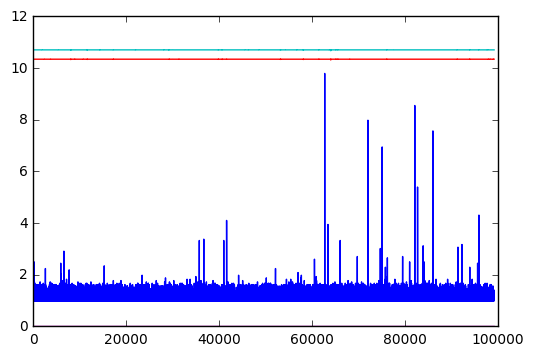

In [334]:
plt.plot(X_train[:,21])

# y_pred = y_pred * 10

plt.plot(y_pred[0])
plt.plot(y_pred_classification[:,1]*10)
plt.plot(y_pred_classification[:,2]*10)
plt.plot(y_pred_classification[:,0]*10)
#plt.plot(y_pred[2])

In [322]:
y_pred_classification[:,1]

array([ 1.03448248,  1.03448308,  1.03448331, ...,  1.03448331,
        1.03448331,  1.03447556], dtype=float32)

In [337]:
model.save('Keras_model.h5')
# For loading 

# from keras.models import load_model
# model = model.load_model('Keras_model.h5')

In [338]:
!ls

actuation.py  Keras_model.h5	README.md	       TNSM_Paper_Demo.ipynb
ANN.py	      Logging.py	requirements.txt       TS_NeuralNet.py
ANN.pyc       Logging.pyc	SLA		       Util.py
ann_util.py   maxlist.py	testing2	       Util.pyc
ann_util.pyc  my_bash		Testing summary
data	      optimization.py	Test.py
Figures       optimization.pyc	TimeSeriesAnalysis.py


## History Plot

In [60]:
X_train_t.shape

(100, 1, 156)

In [61]:
y_train_small.shape

(100, 3)

In [46]:
H = history[1]
H.history
H.model.get_config()
H.params

['loss', 'acc']

## Saving the model and the training history

In [53]:
import pickle

# Saving the history and the model

for i,H in enumerate(zip(history,models)):
    with open('history_10000_sample_'+str(i)+'_.dat', 'wb') as file_pi:
        pickle.dump(H[0].history, file_pi)
    H[1].save('Keras_model_10000_samples_'+str(i)+'.h5')

## Loading the training history

In [26]:
import pickle 
import os

history = []


for f in os.listdir('.'):
    # History file ends with '.dat', model file ends with '.h5'
    if str(f).endswith('.dat'): #'.dat' in f: 
        print("Reading the file {} ".format(f))
        with (open(f, "rb")) as openfile:
             while True:
                try:
                    history.append(pickle.load(openfile))
                except EOFError:
                        break
                except KeyError:
                    print "key Error !"
                    break

                
# history

Reading the file history_10000_sample_9_.dat 
Reading the file history_10000_sample_5_.dat 
Reading the file history_10000_sample_0_.dat 
Reading the file history_10000_sample_4_.dat 
Reading the file history_10000_sample_2_.dat 
Reading the file history_10000_sample_3_.dat 
Reading the file history_10000_sample.dat 
Reading the file history_10000_sample_8_.dat 
Reading the file history_10000_sample_6_.dat 
Reading the file history_10000_sample_1_.dat 
Reading the file history_10000_sample_7_.dat 


#########################################
##############  Model 0:
 {'class_name': 'LSTM', 'config': {'U_regularizer': None, 'name': 'lstm_2', 'inner_activation': 'hard_sigmoid', 'go_backwards': False, 'activation': 'linear', 'trainable': True, 'unroll': False, 'consume_less': 'cpu', 'stateful': False, 'init': 'glorot_uniform', 'inner_init': 'orthogonal', 'dropout_U': 0.0, 'dropout_W': 0.0, 'input_dim': 2, 'return_sequences': True, 'b_regularizer': None, 'W_regularizer': None, 'output_dim': 12, 'forget_bias_init': 'one', 'input_length': None}}   ##############
#########################################
############################## 
 ######################## 
 #####################


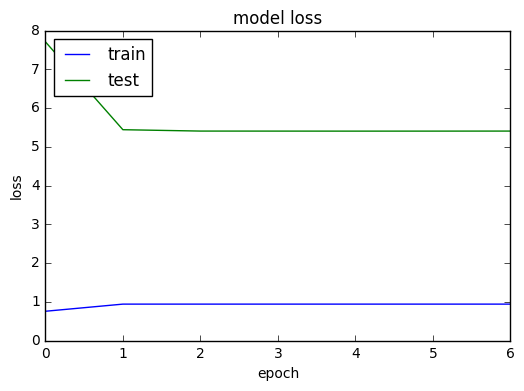

#########################################
##############  Model 1:
 {'class_name': 'LSTM', 'config': {'U_regularizer': None, 'name': 'lstm_15', 'inner_activation': 'hard_sigmoid', 'go_backwards': False, 'activation': 'softmax', 'trainable': True, 'unroll': False, 'consume_less': 'cpu', 'stateful': False, 'init': 'glorot_uniform', 'inner_init': 'orthogonal', 'dropout_U': 0.0, 'dropout_W': 0.0, 'input_dim': 4, 'return_sequences': True, 'b_regularizer': None, 'W_regularizer': None, 'output_dim': 10, 'forget_bias_init': 'one', 'input_length': None}}   ##############
#########################################
############################## 
 ######################## 
 #####################


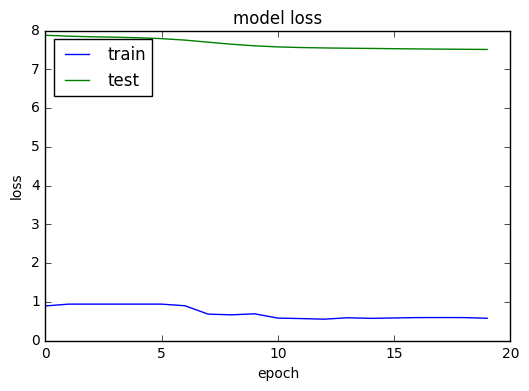

#########################################
##############  Model 2:
 {'class_name': 'Dropout', 'config': {'p': 0.5, 'trainable': True, 'name': 'dropout_1'}}   ##############
#########################################
############################## 
 ######################## 
 #####################


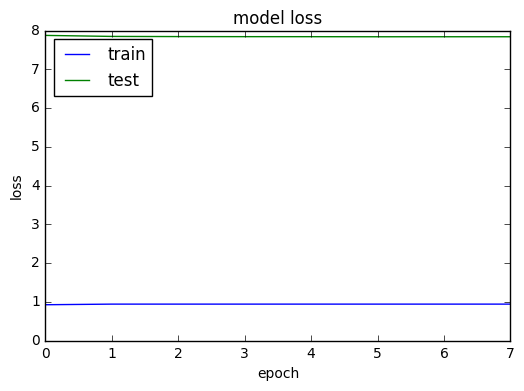

#########################################
##############  Model 3:
 {'class_name': 'LSTM', 'config': {'U_regularizer': None, 'name': 'lstm_28', 'inner_activation': 'hard_sigmoid', 'go_backwards': False, 'activation': 'hard_sigmoid', 'trainable': True, 'unroll': False, 'consume_less': 'cpu', 'stateful': False, 'init': 'glorot_uniform', 'inner_init': 'orthogonal', 'dropout_U': 0.0, 'dropout_W': 0.0, 'input_dim': 3, 'return_sequences': True, 'b_regularizer': None, 'W_regularizer': None, 'output_dim': 3, 'forget_bias_init': 'one', 'input_length': None}}   ##############
#########################################
############################## 
 ######################## 
 #####################


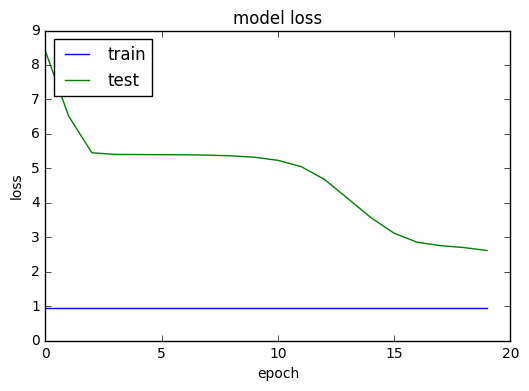

#########################################
##############  Model 4:
 {'class_name': 'LSTM', 'config': {'U_regularizer': None, 'name': 'lstm_36', 'inner_activation': 'hard_sigmoid', 'go_backwards': False, 'activation': 'tanh', 'trainable': True, 'unroll': False, 'consume_less': 'cpu', 'stateful': False, 'init': 'glorot_uniform', 'inner_init': 'orthogonal', 'dropout_U': 0.0, 'dropout_W': 0.0, 'input_dim': 5, 'return_sequences': True, 'b_regularizer': None, 'W_regularizer': None, 'output_dim': 3, 'forget_bias_init': 'one', 'input_length': None}}   ##############
#########################################
############################## 
 ######################## 
 #####################


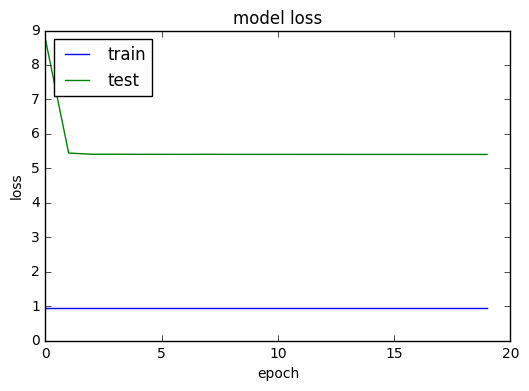

In [30]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# Fit the model

for i,L in enumerate(history):
    # list all data in history
    #print(L.keys())
    # summarize history for accuracy
    print("#########################################")
    print("##############  Model {}:\n {}   ##############".format(i,history[i].model.get_config()[1]))
    print("#########################################")
    plt.plot(L.history['acc'])
    #plt.plot(L.history['val_acc'])

    # summarize history for loss
    plt.plot(L.history['loss'])
    #plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    
    print("############################## \n ######################## \n #####################")
    plt.show()

In [33]:
history[0].params

{'batch_size': 3,
 'do_validation': False,
 'metrics': ['loss', 'acc'],
 'nb_epoch': 30,
 'nb_sample': 100,
 'verbose': 1}

In [34]:
config = history[0].model.get_config()

# Next step

Hi, the goal of this lesson is to learn how to develop LSTM models that use a Convolutional Neural Network on the front end.

The CNN LSTM architecture involves using Convolutional Neural Network (CNN) layers for feature extraction on input data combined with LSTMs to support sequence prediction. This architecture is used for the task of generating textual descriptions of images.

We can define a CNN LSTM model to be trained jointly in Keras.

A CNN LSTM can be defined by adding CNN layers on the front end followed by LSTM layers with a Dense layer on the output. The same input features are used for each step in the output sequence. This requires that the input CNN model be wrapped in a TimeDistributed layer.

model = Sequential()
model.add(TimeDistributed(Conv2D(...))
model.add(TimeDistributed(MaxPooling2D(...)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(...))
model.add(Dense(...))

Exercises

    What are the difficulties of using a vanilla LSTM with spatial input data?
    What is the CNN LSTM architecture?
    What benefits does the CNN LSTM provide?
    How can the CNN LSTM architecture be implemented in Keras?

Experiment
Design and execute an experiment that demonstrates a CNN LSTM on a sequence prediction problem with spatial input.

In the next lesson, you will discover how to develop an Encoder-Decoder LSTM architecture.

P.S. Ready to take the next step? Check out my popular Ebook:
    >> Long Short-Term Memory Networks With Python